In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

### Czarne punkty na mapie to stacje z których są pobierane informacje

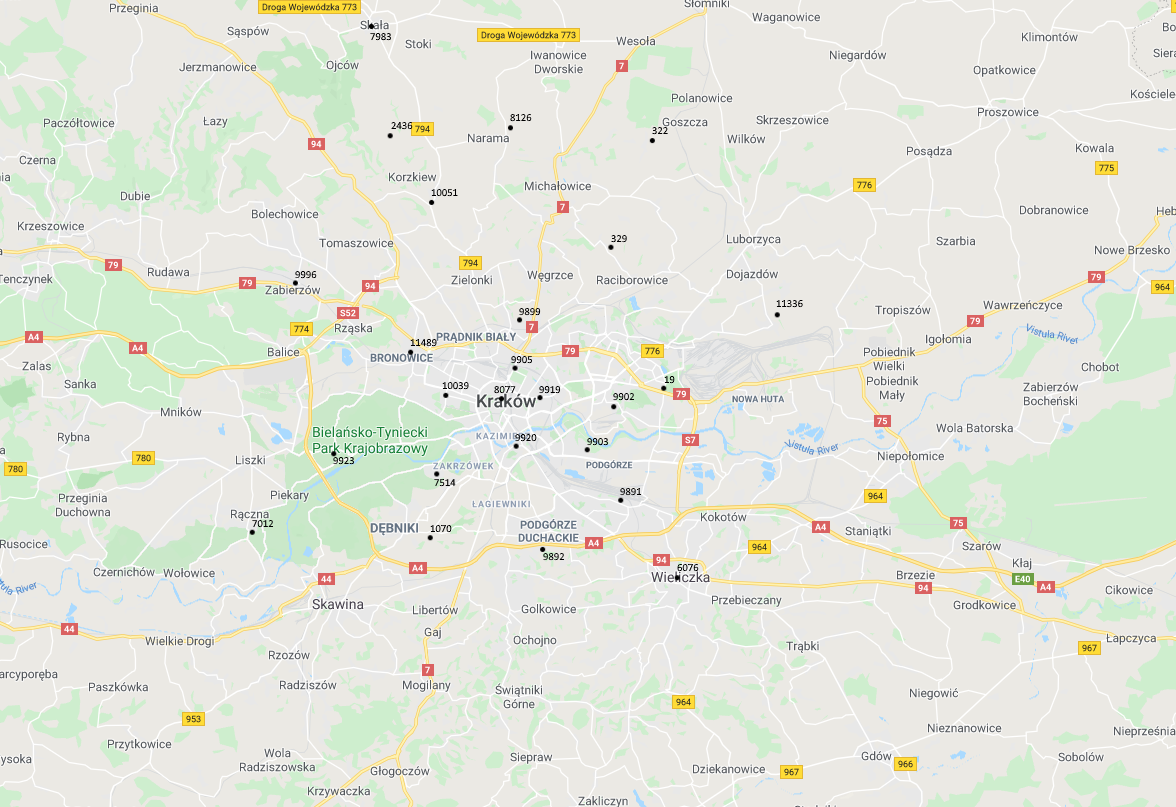

In [11]:
from IPython.display import Image
Image(filename='mapa_google.png') 
# TODO: oznaczyc kazda ze stacji jednym kolorem by byly zawsze takie same na wykresach

## Wczytanie danych z pliku csv

In [12]:
df = pd.read_csv('./measurements.csv', header = 0).iloc[:, 1:]
df = df.drop(columns=['indexLevel'])

## Wczytanie danych z prosto z bazy danych

In [120]:
import sqlalchemy
import pyodbc

fo = open('password.conf', 'r+')
password = fo.readline()
connection_string = 'Driver={ODBC Driver 13 for SQL Server};Server=tcp:airly-db-server.database.windows.net,1433;Database=AirlyDatabase;Uid=admin1;Pwd=%s;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;' % (password)

cnxn = pyodbc.connect(connection_string)
df = pd.read_sql_query('select * from measurement', cnxn).iloc[:, 1:]

In [121]:
df['fromDataTime'] = df['fromDataTime'].apply(lambda x: pd.to_datetime(x))
df['tillDateTime'] = df['tillDateTime'].apply(lambda x: pd.to_datetime(x))

df

installationId        fromDataTime        tillDateTime   PM1   PM25  \
0                 19 2020-03-06 15:00:00 2020-03-06 16:00:00   NaN   9.18   
1                 19 2020-03-06 16:00:00 2020-03-06 17:00:00   NaN  11.90   
2                 19 2020-03-06 17:00:00 2020-03-06 18:00:00   NaN  14.68   
3                 19 2020-03-06 18:00:00 2020-03-06 19:00:00   NaN  13.06   
4                 19 2020-03-06 19:00:00 2020-03-06 20:00:00   NaN  11.14   
...              ...                 ...                 ...   ...    ...   
7284           11489 2020-03-22 15:00:00 2020-03-22 16:00:00  3.85   5.33   
7285           11489 2020-03-22 16:00:00 2020-03-22 17:00:00  5.35   7.39   
7286           11489 2020-03-22 17:00:00 2020-03-22 18:00:00  5.96   8.60   
7287           11489 2020-03-22 18:00:00 2020-03-22 19:00:00  6.57   9.34   
7288           11489 2020-03-22 19:00:00 2020-03-22 20:00:00  5.95   8.42   

       PM10  PRESSURE  HUMIDITY  TEMPERATURE  indexValue indexLevel    NO2  \
0     31.15       NaN     76.36     3.888889       31.15        LOW  65.31   
1     35.42       NaN     76.36     3.888889       35.42        LOW  68.93   
2     38.20       NaN     76.36     3.888889       38.20        LOW  70.74   
3     32.74       NaN     76.36     3.888889       32.74        LOW  61.21   
4     24.30       NaN     76.36     3.888889       24.30   VERY_LOW  34.67   
...     ...       ...       ...          ...         ...        ...    ...   
7284   9.83   1031.25     53.79     0.270000        9.83   VERY_LOW    NaN   
7285  13.78   1031.85     62.92    -0.070000       13.78   VERY_LOW    NaN   
7286  16.61   1032.56     68.68    -0.790000       16.61   VERY_LOW    NaN   
7287  17.42   1033.27     69.55    -1.220000       17.42   VERY_LOW    NaN   
7288  16.04   1033.38     72.48    -1.420000       16.04   VERY_LOW    NaN   

          CO  CLOUDCOVER  WINDDIRECTION  WINDSPEED  
0     440.75        59.7         110.54       10.3  
1     464.01        59.7         110.54       10.3  
2     528.15        59.7         110.54       10.3  
3     478.53        59.7         110.54       10.3  
4     392.50        59.7         110.54       10.3  
...      ...         ...            ...        ...  
7284     NaN        40.1         138.00       15.0  
7285     NaN        40.1         138.00       15.0  
7286     NaN        40.1         138.00       15.0  
7287     NaN        40.1         138.00       15.0  
7288     NaN        40.1         138.00       15.0  

[7289 rows x 16 columns]

In [135]:
installationd_id = df['installationId'].unique()
installationd_id.sort()
measurements_by_installation_id = dict()
for id in installationd_id:
    measurements_by_installation_id[id] = df.loc[df['installationId'] == id]

## Wykresy wszystykich stacji

In [123]:
import matplotlib.dates as mdates

def plotAllData(column: str):
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    for id, measurements in measurements_by_installation_id.items():
        ax.plot(measurements.fromDataTime, measurements[column], label=id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel(column)
    plt.title(column)
    plt.legend()

    plt.show()

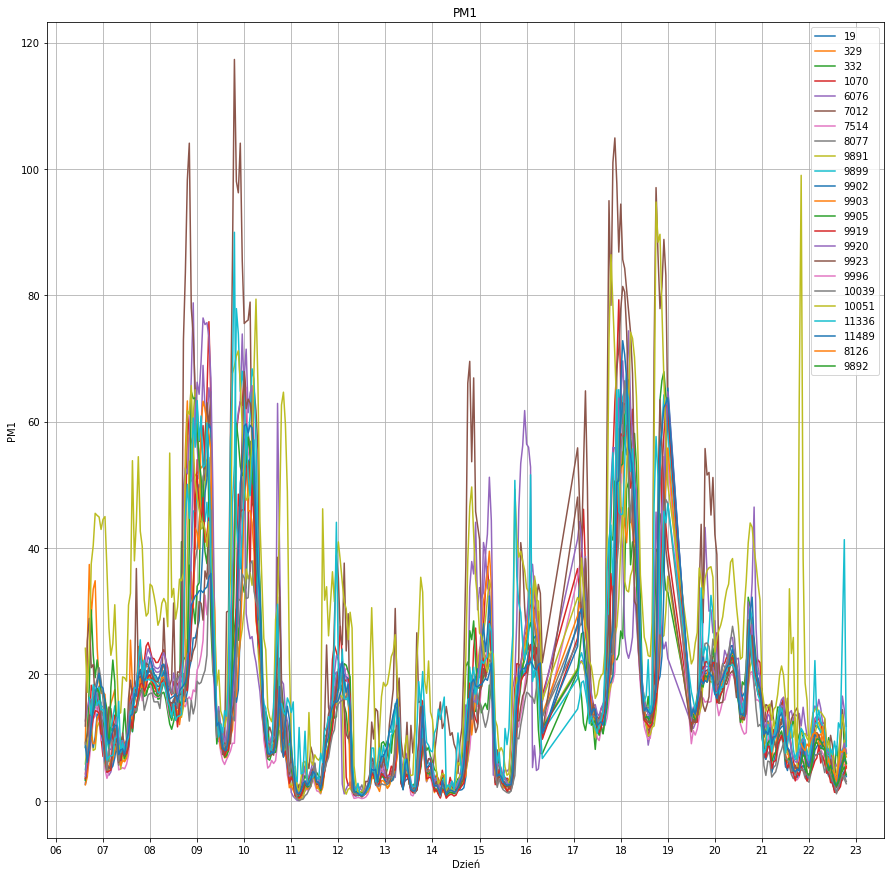

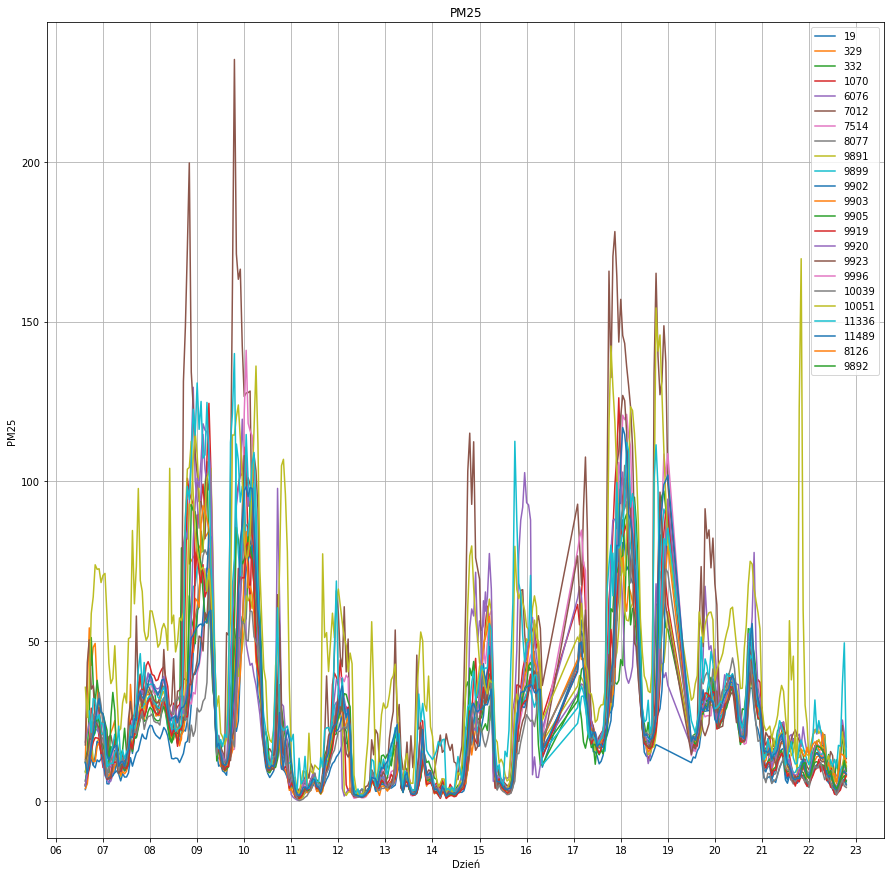

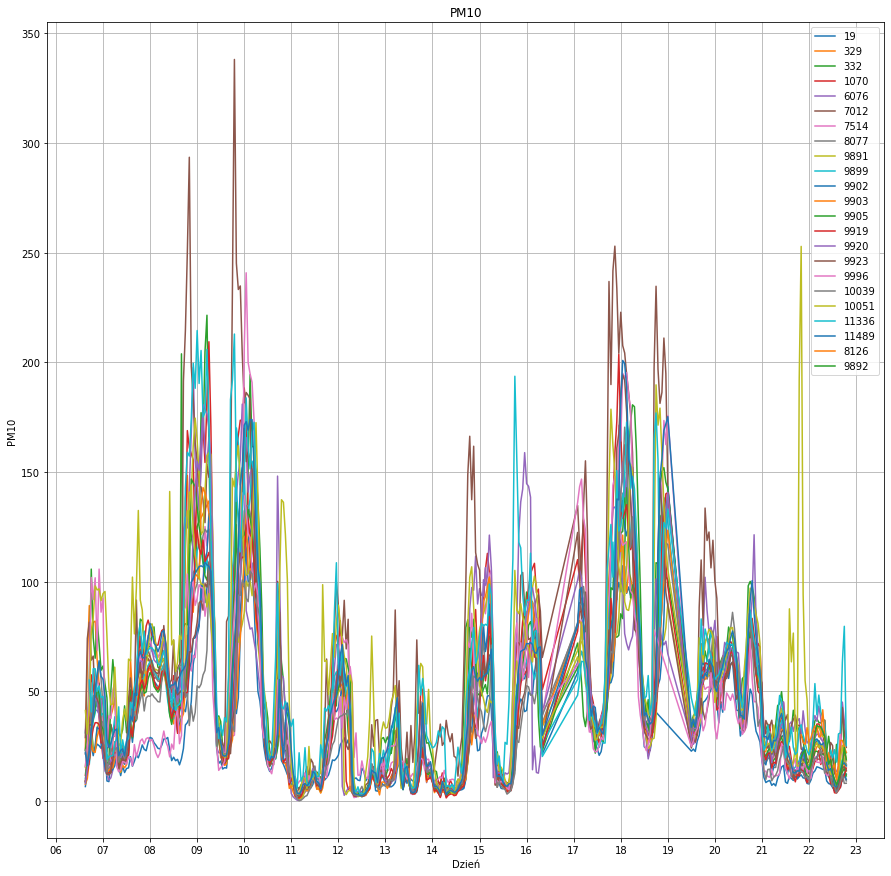

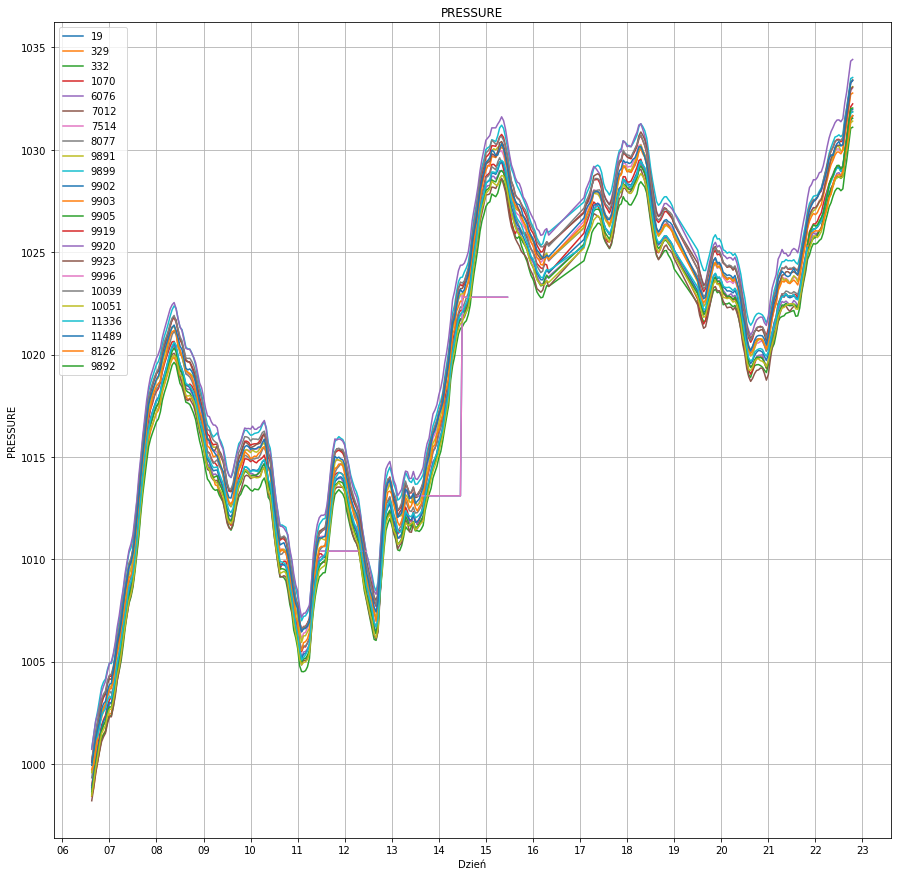

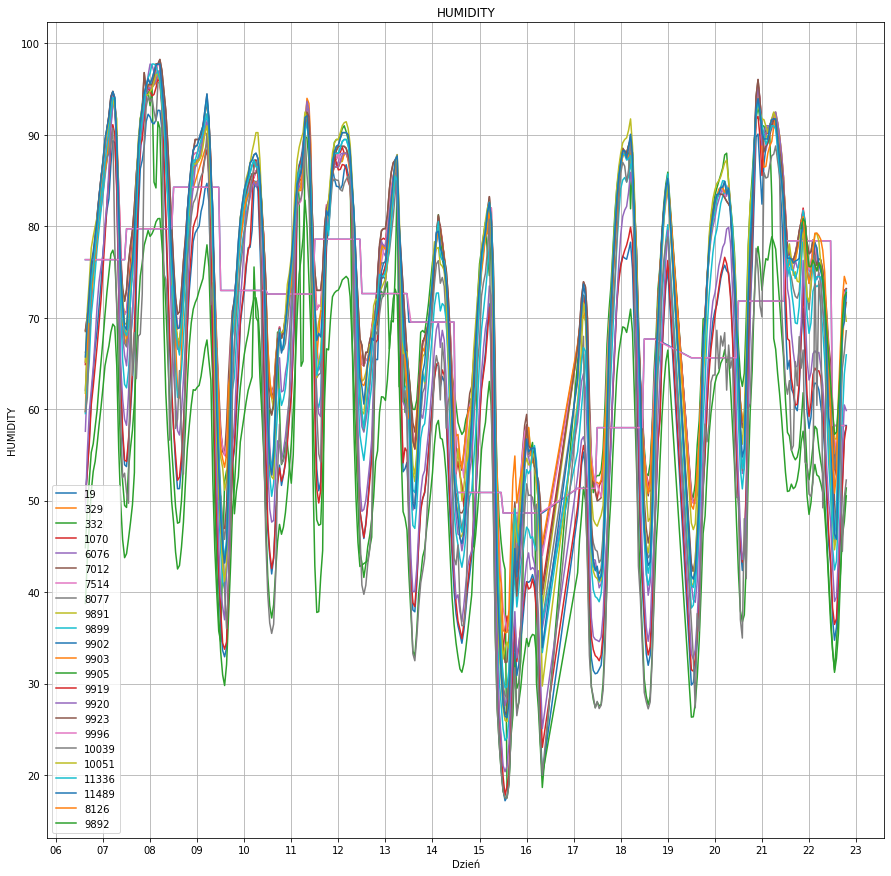

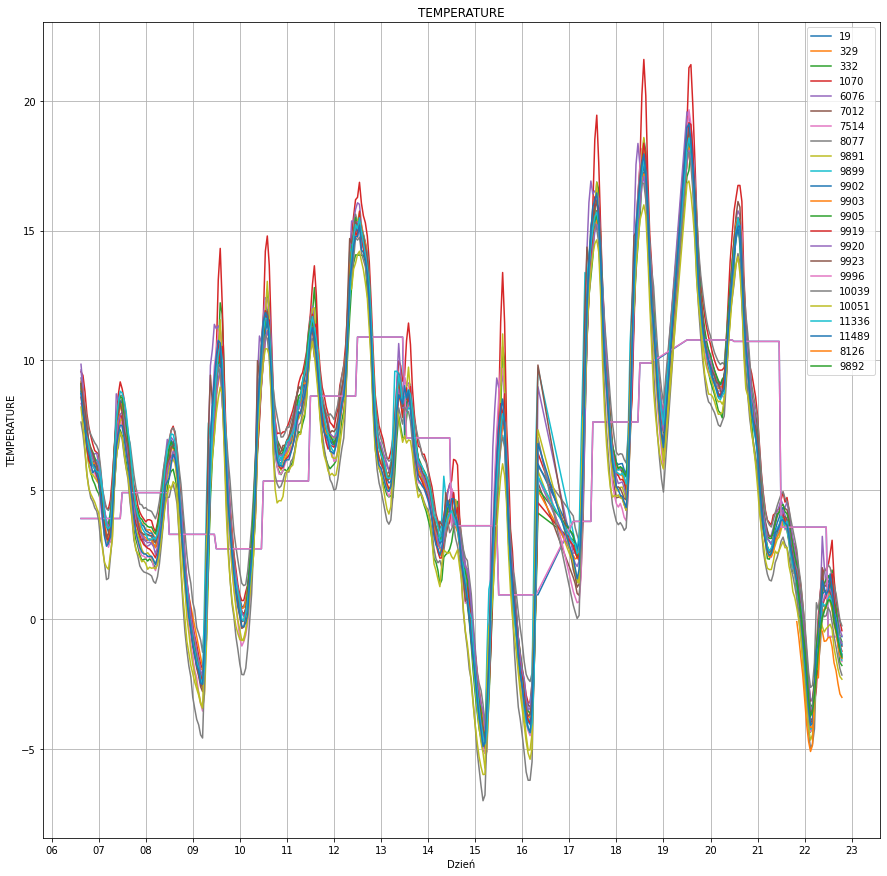

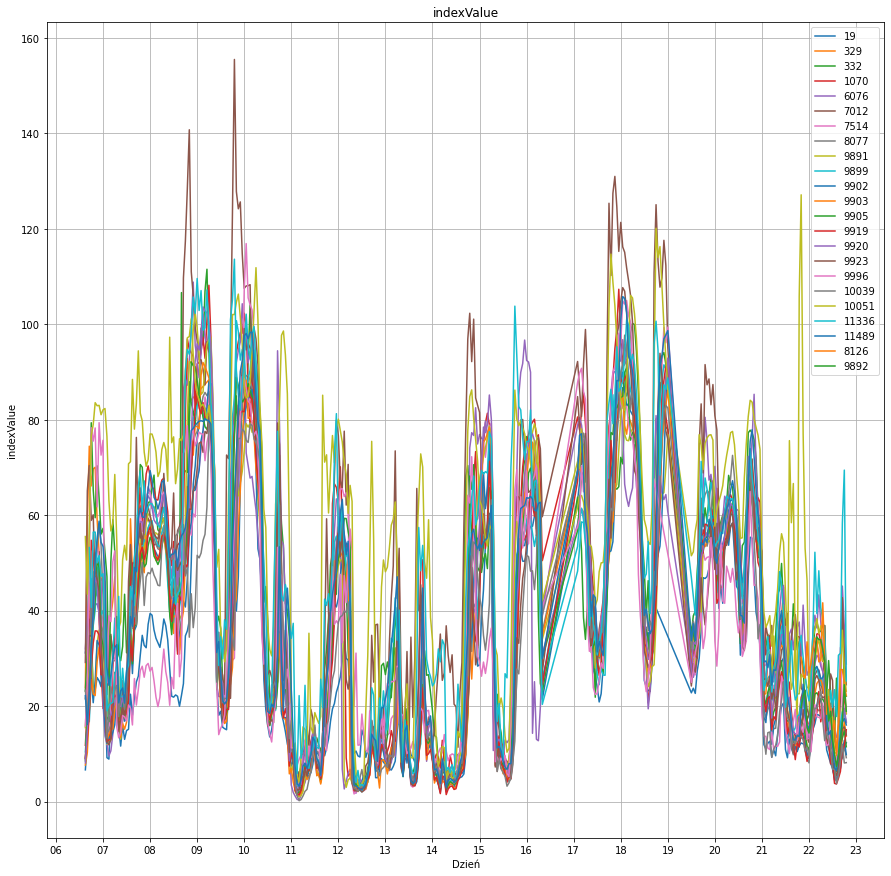

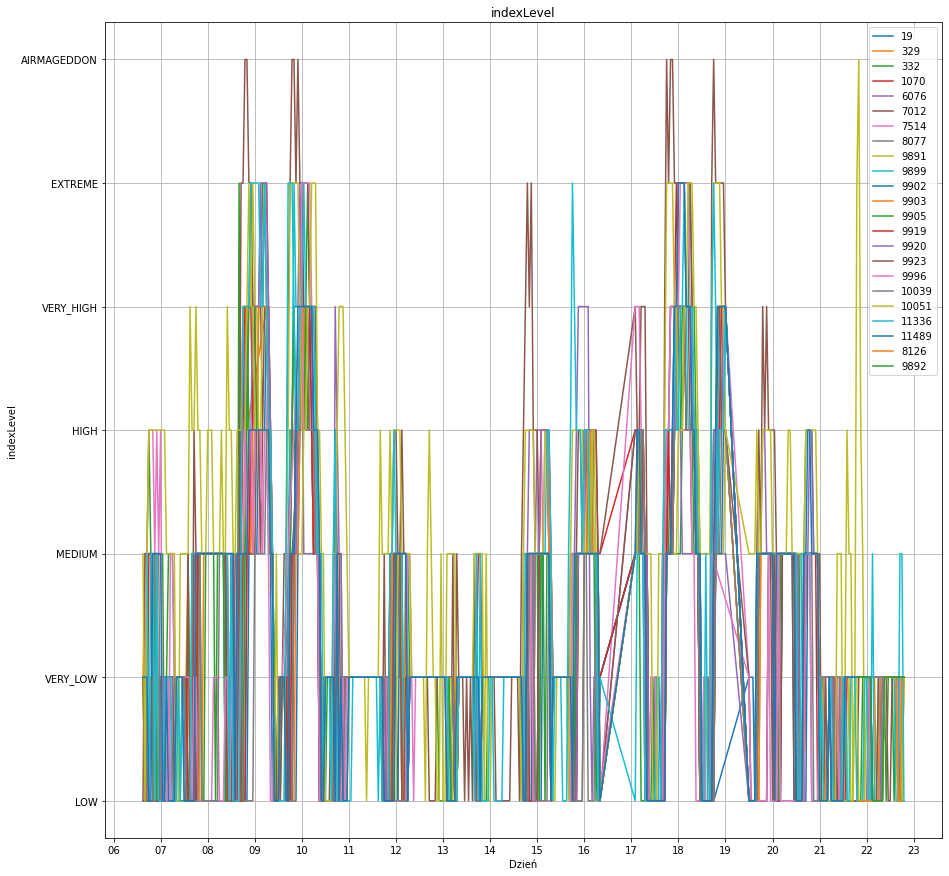

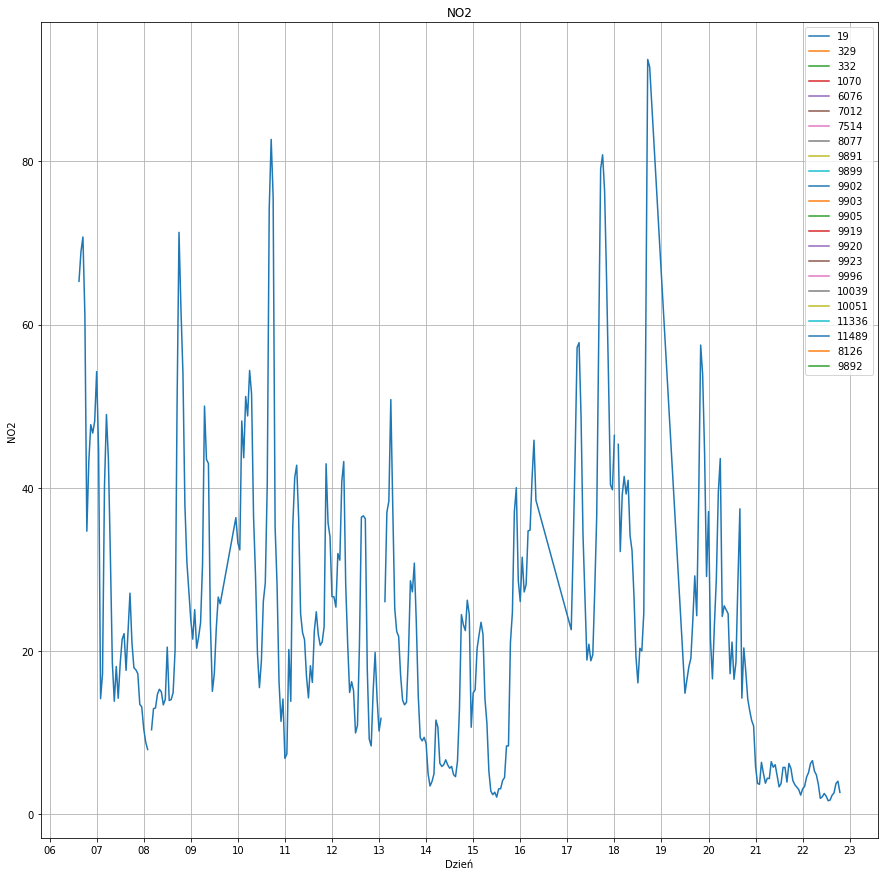

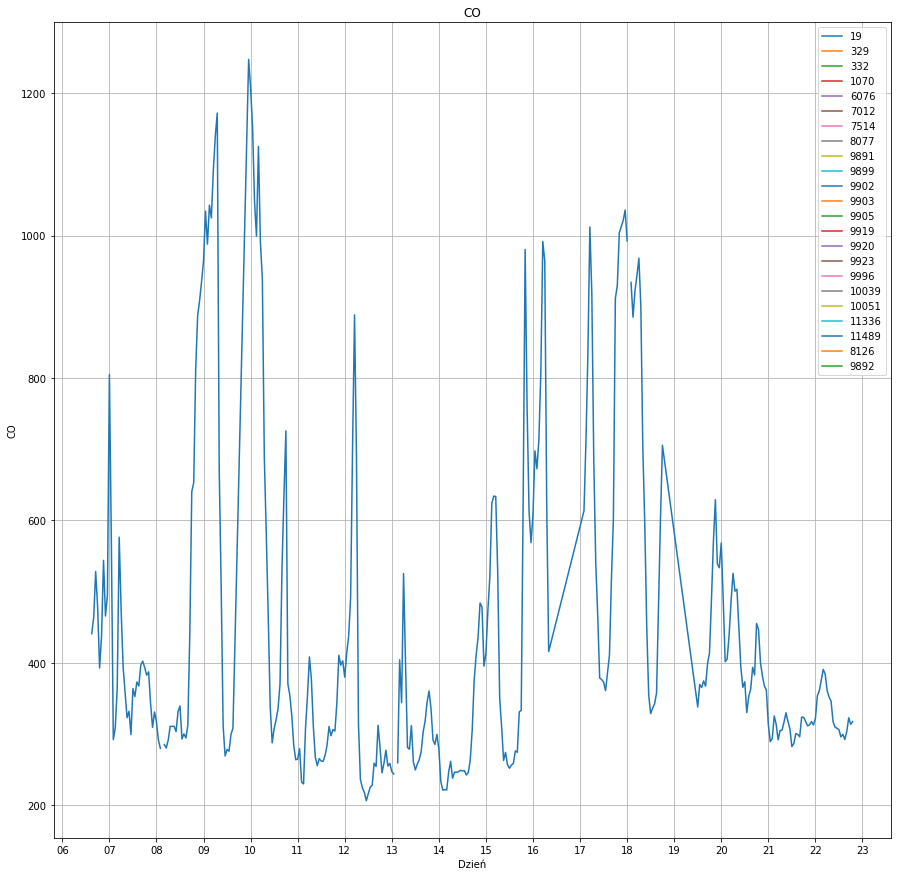

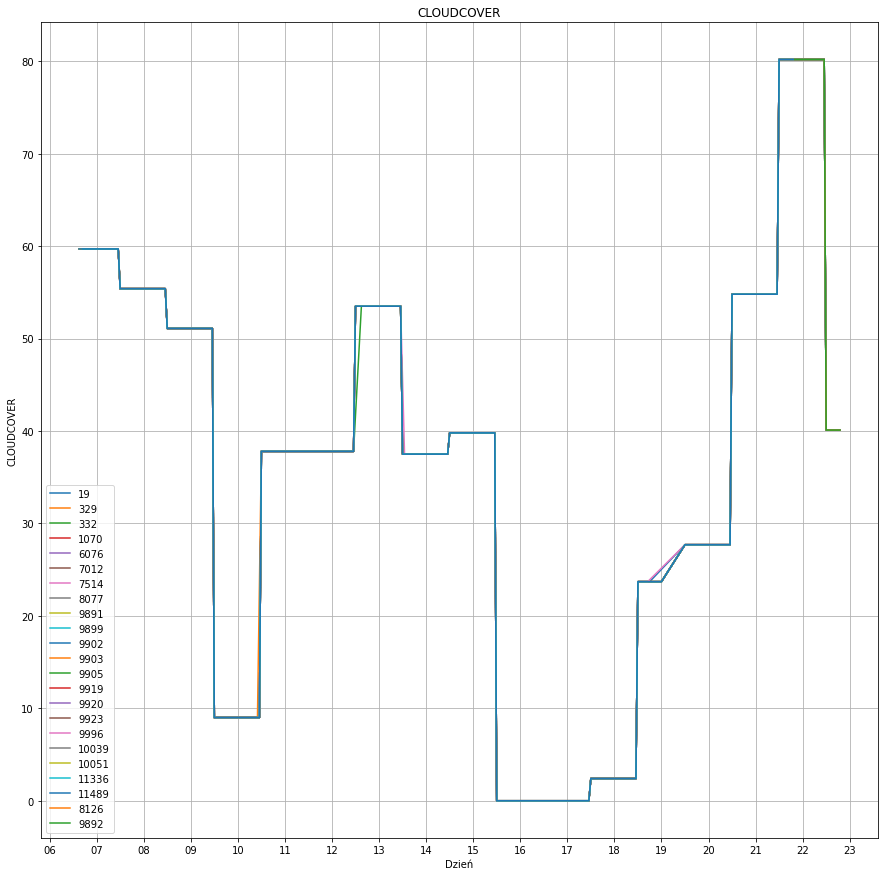

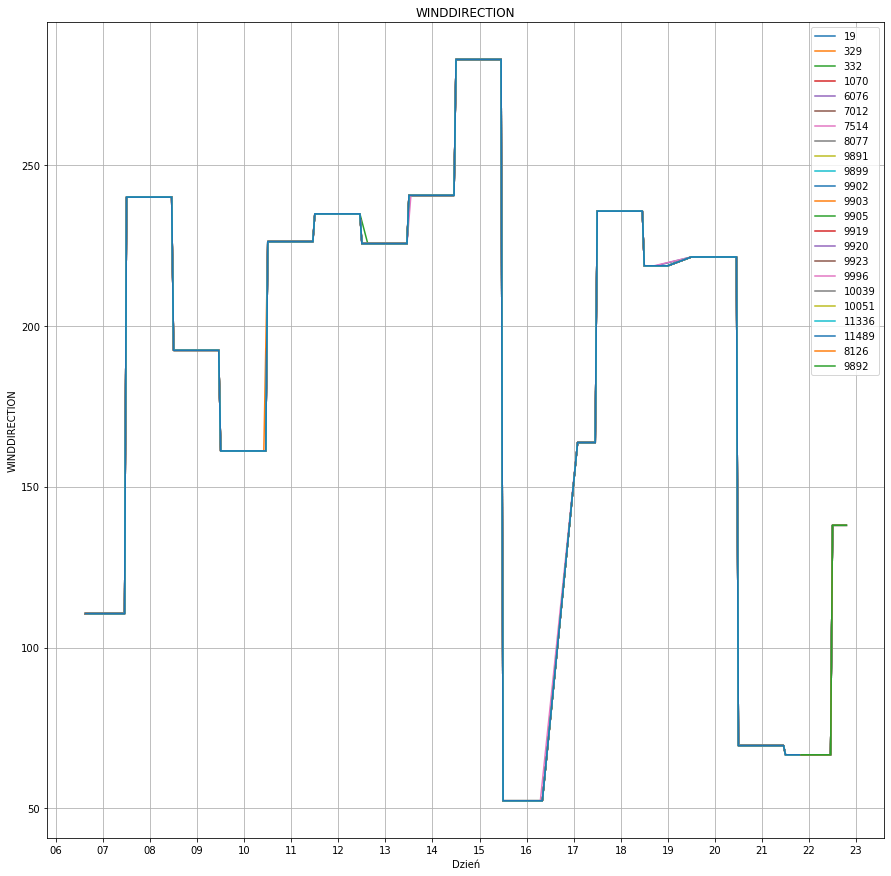

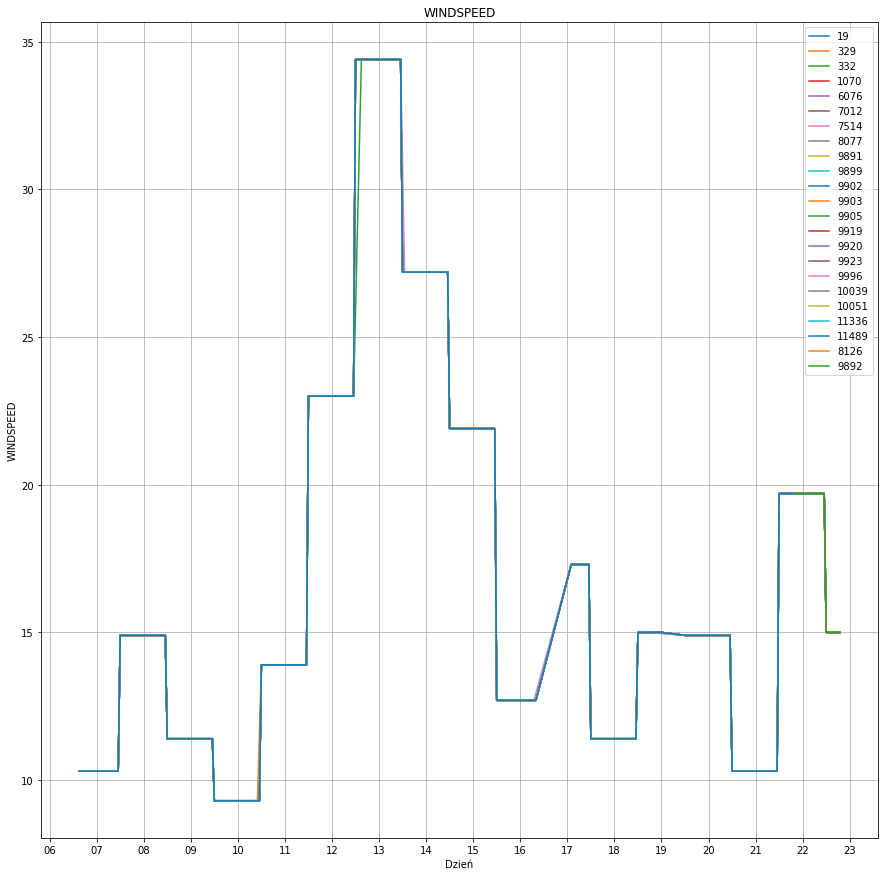

In [124]:
columns_to_plot = np.delete(df.columns.values, (0, 1, 2))
columns_to_plot
for col in columns_to_plot:
    plotAllData(col)

In [73]:
def plot_humidity(installation_id):
    measurements = measurements_by_installation_id[installation_id]
    if(measurements['HUMIDITY'].isnull().all()):
        return
    
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    ax.plot(measurements.fromDataTime, measurements['HUMIDITY'], label=installation_id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel('Wilgotność [%]')
    plt.title('Wilgotność dla instalacji %d' % (installation_id))

    plot_name = 'HUMIDITY_' + str(installation_id)
    plt.savefig('./plots/%s.png' % (plot_name))
    plt.show()

In [71]:
def plot_temperature(installation_id):
    measurements = measurements_by_installation_id[installation_id]
    if(measurements['TEMPERATURE'].isnull().all()):
        return
    
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    ax.plot(measurements.fromDataTime, measurements['TEMPERATURE'], label=installation_id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel('Temperatura [C]')
    plt.title('Temperatura dla instalacji %d' % (installation_id))

    plot_name = 'TEMPERATURE_' + str(installation_id)
    plt.savefig('./plots/%s.png' % (plot_name))
    plt.show()

## Wykresy temperatury dla każdej stacji

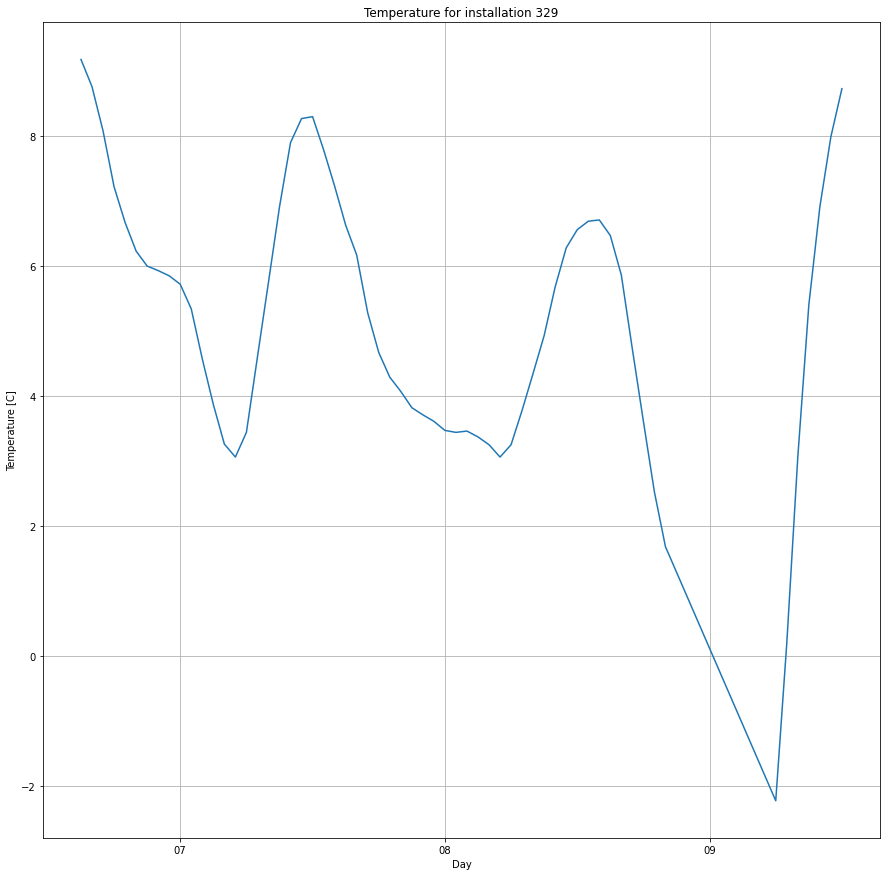

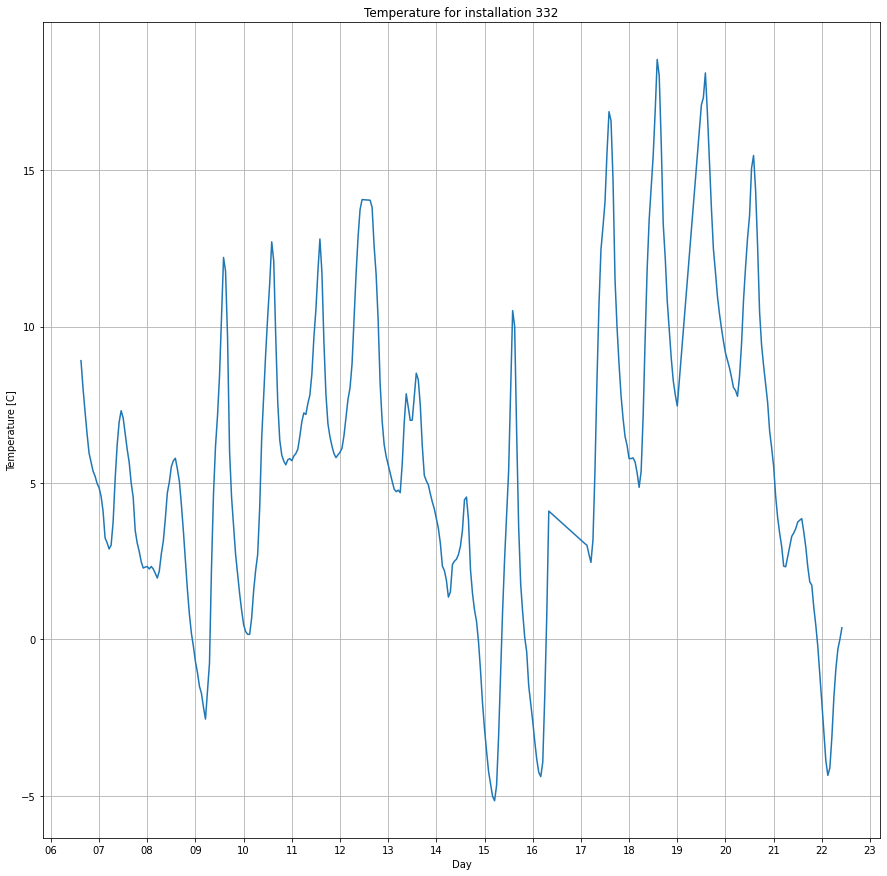

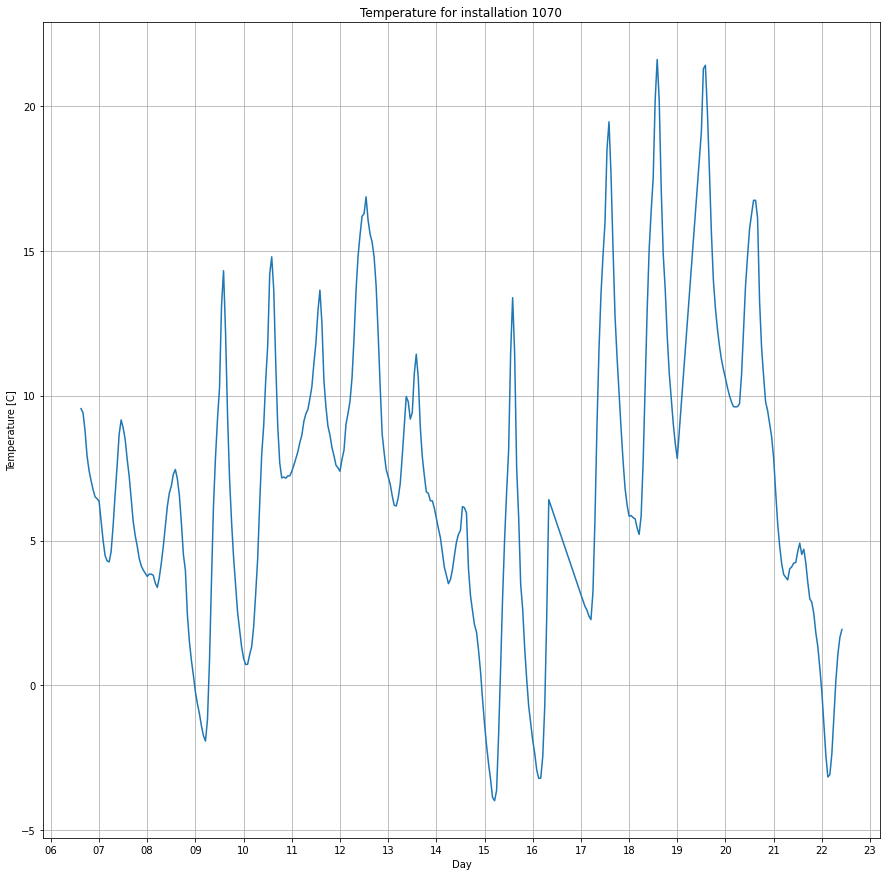

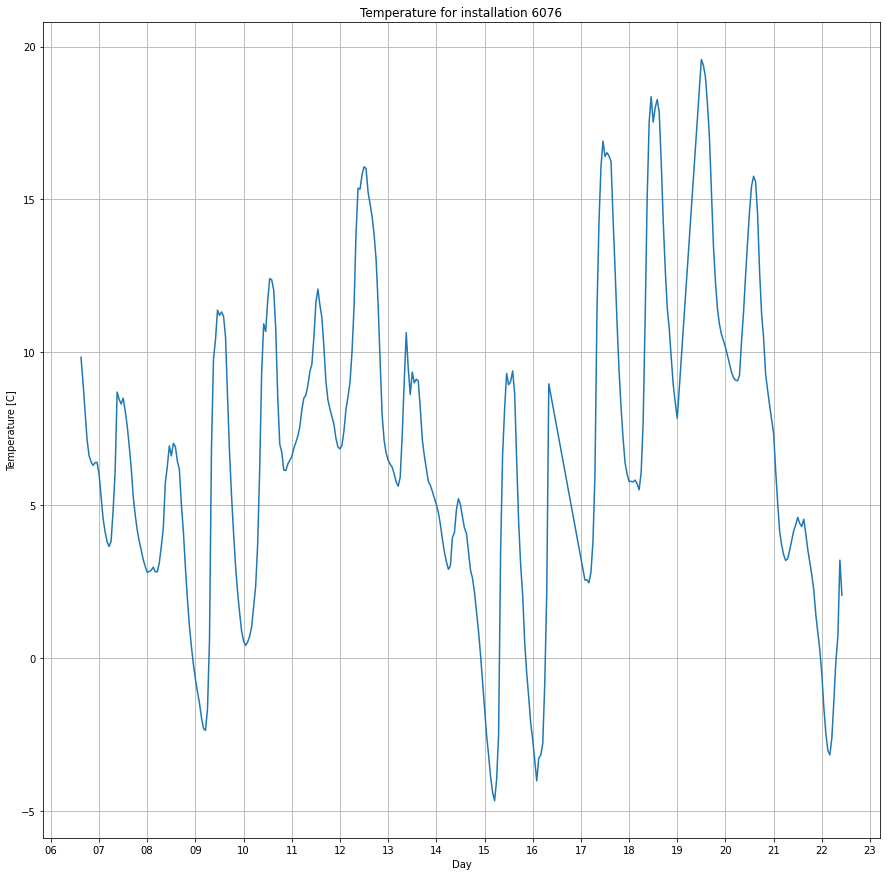

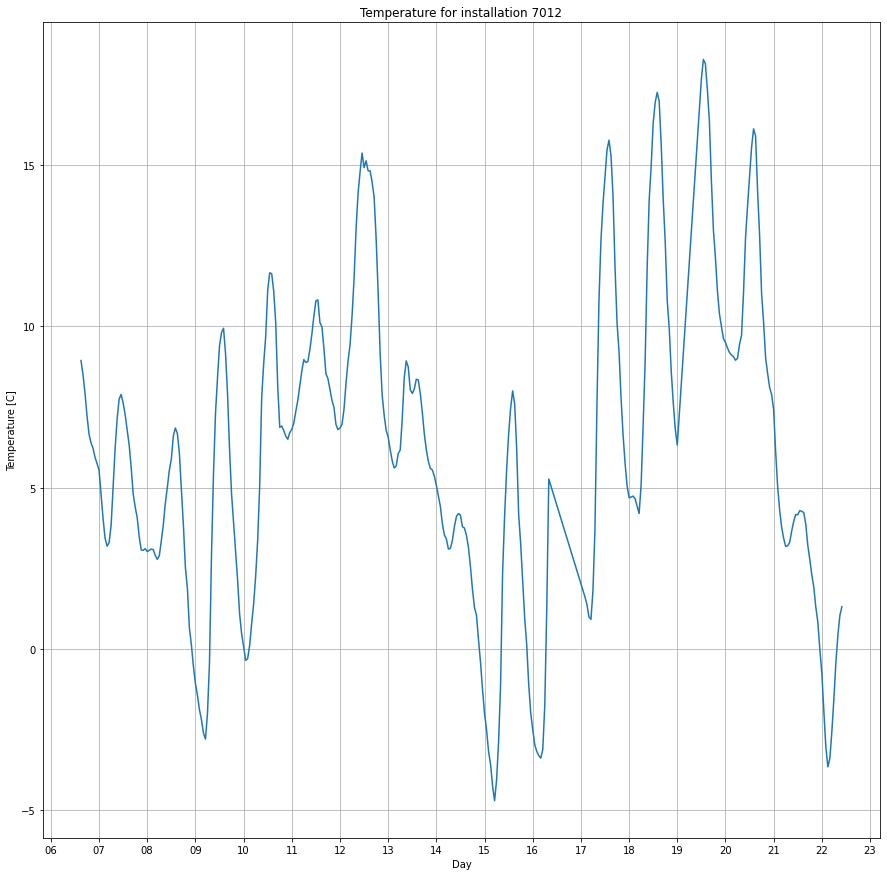

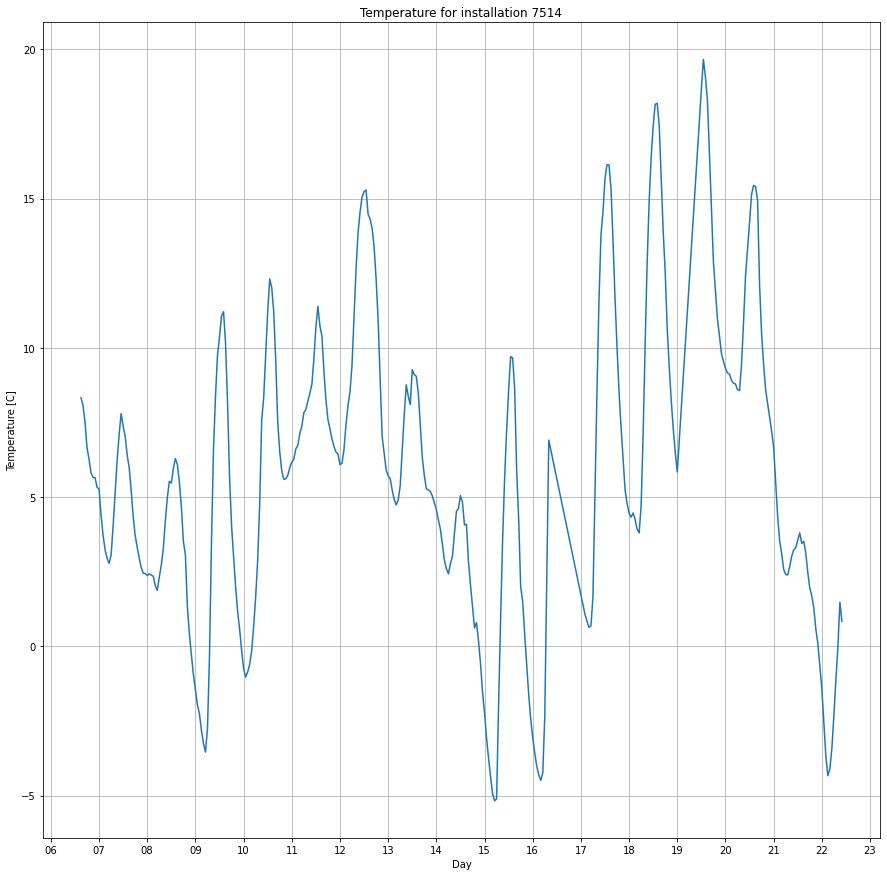

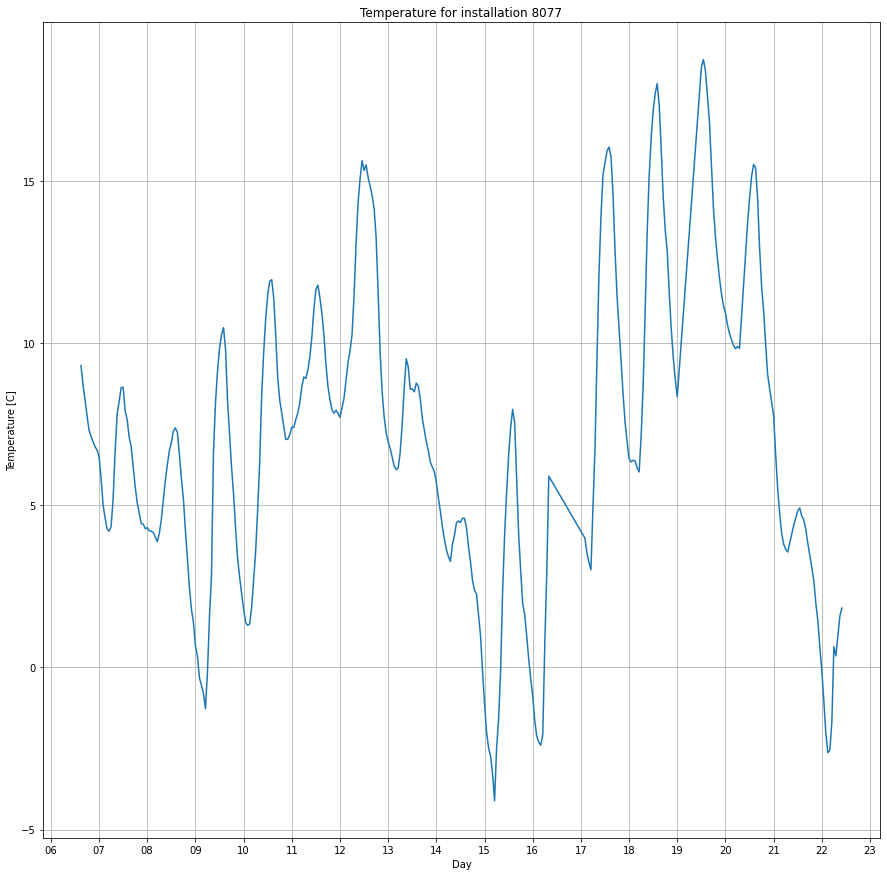

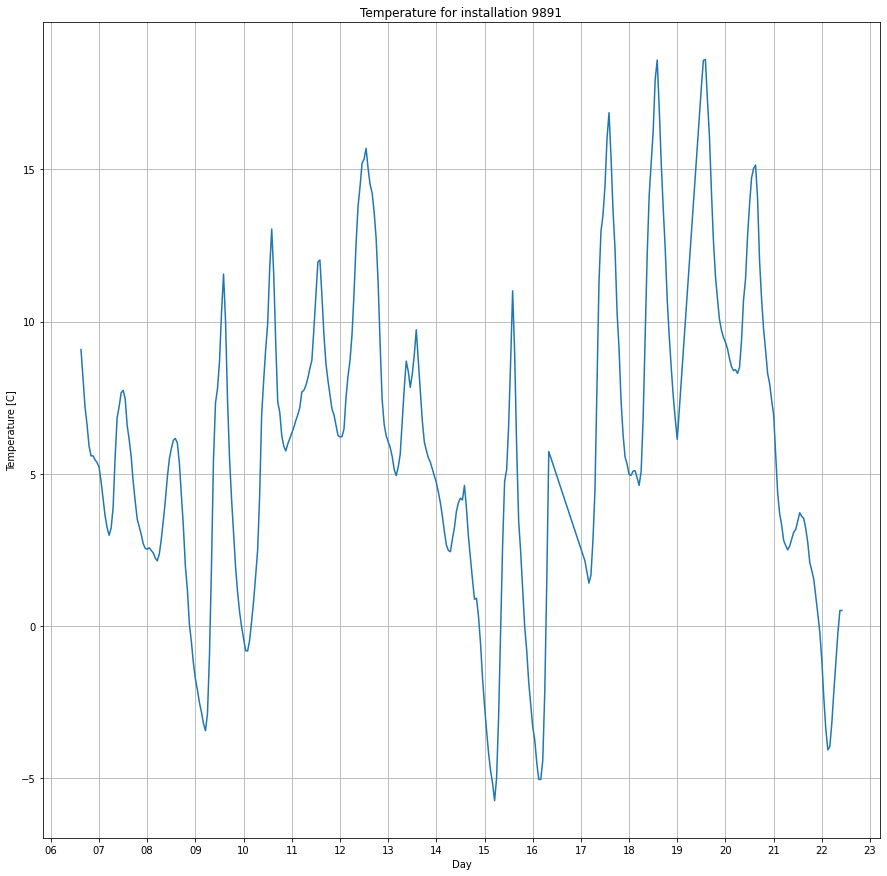

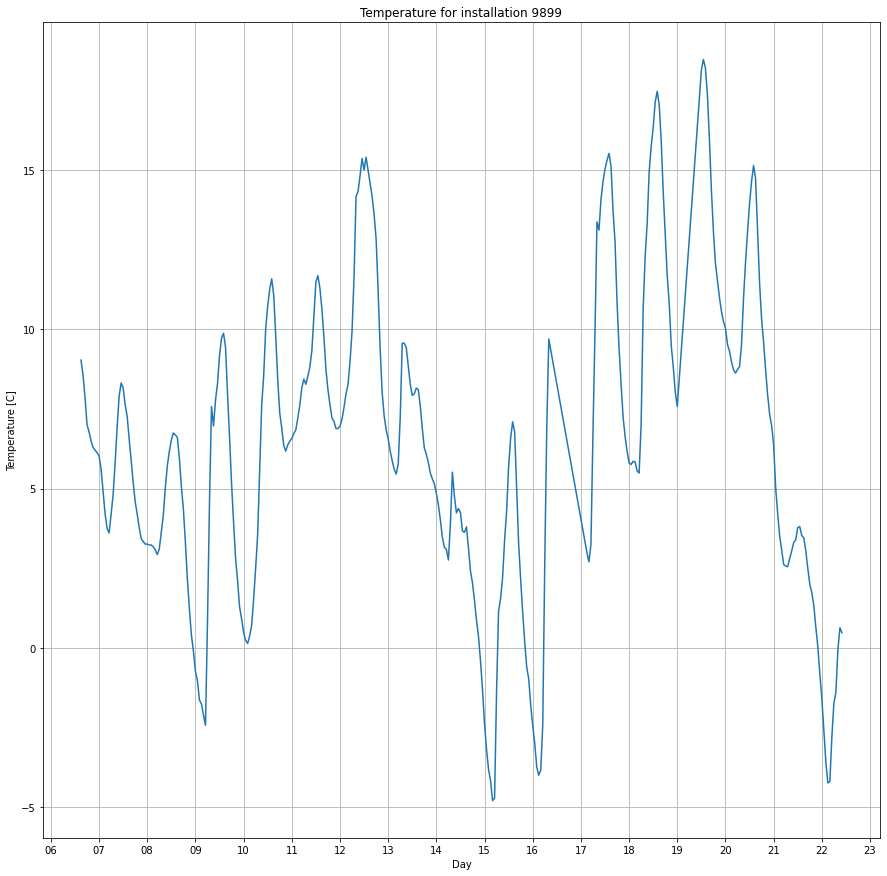

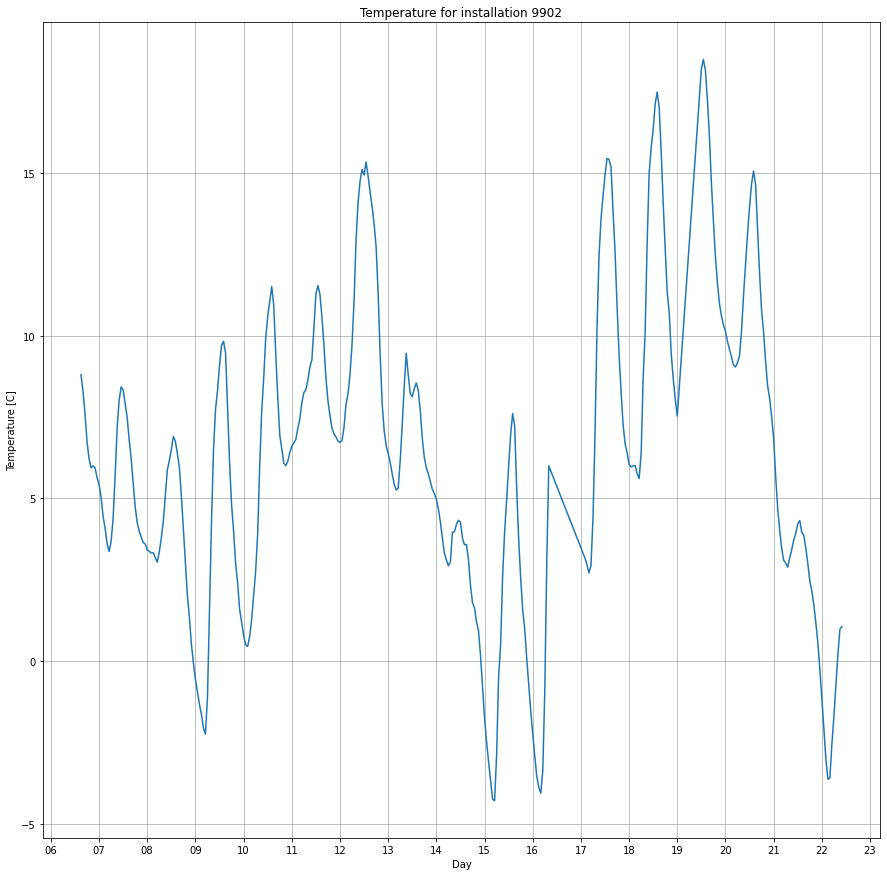

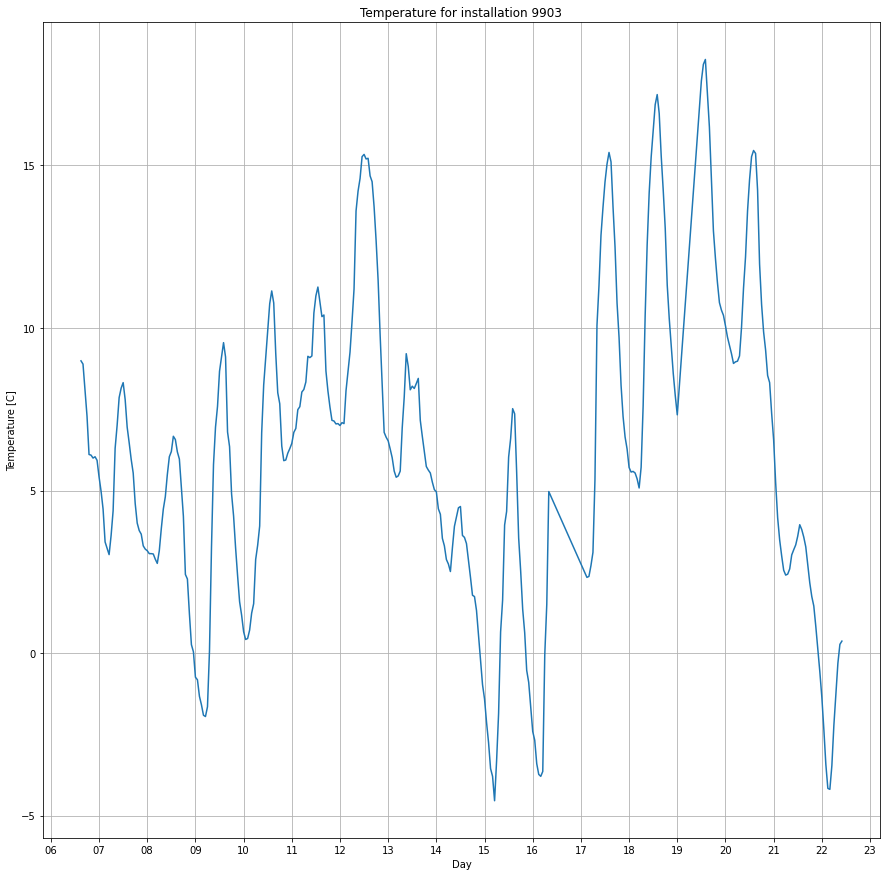

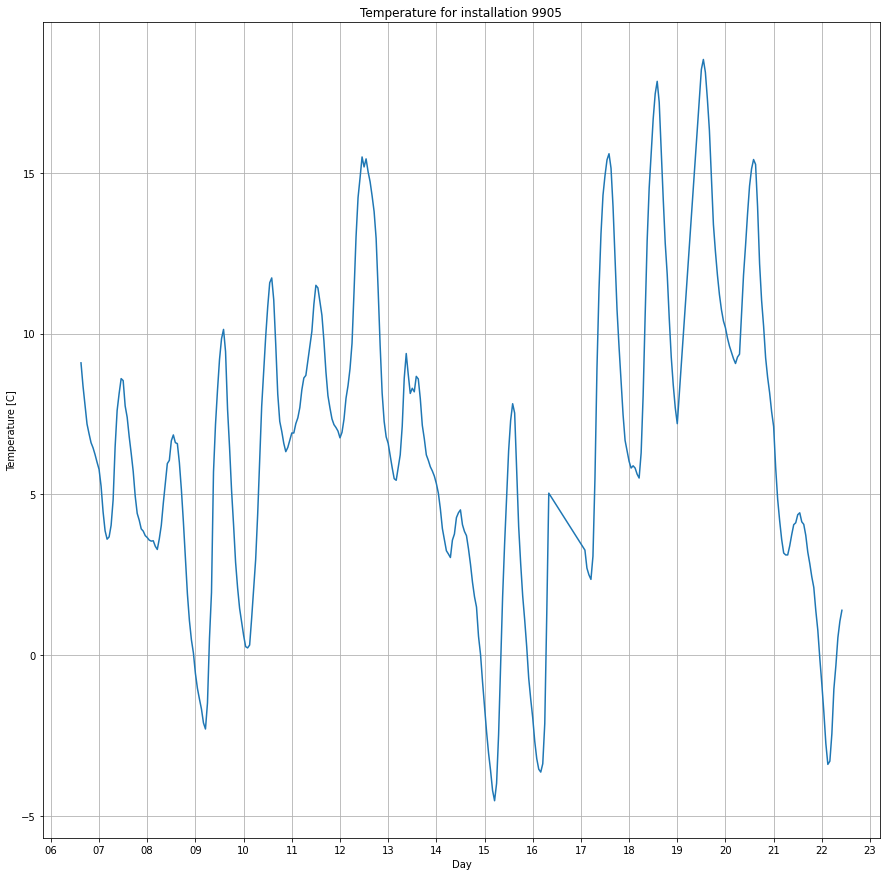

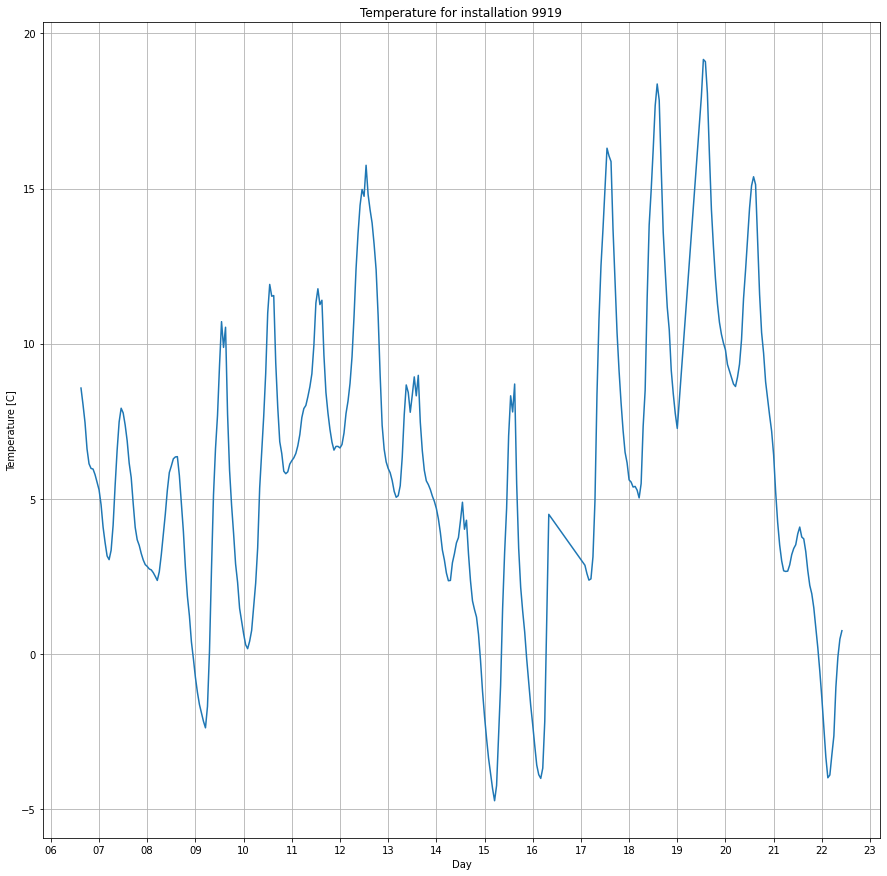

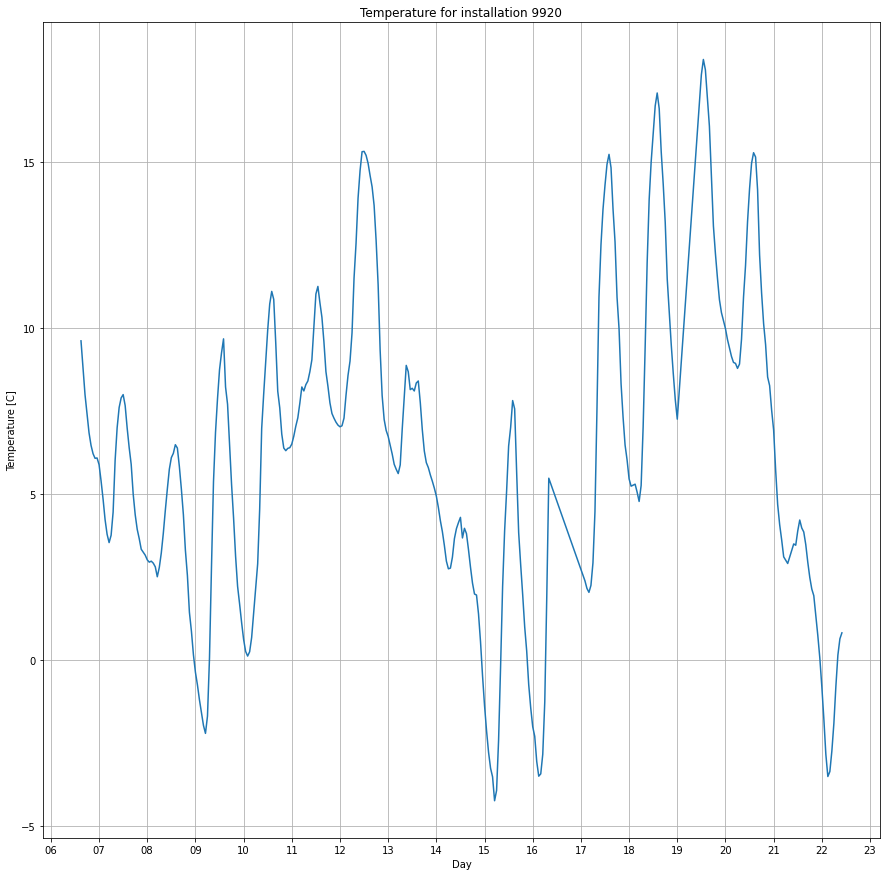

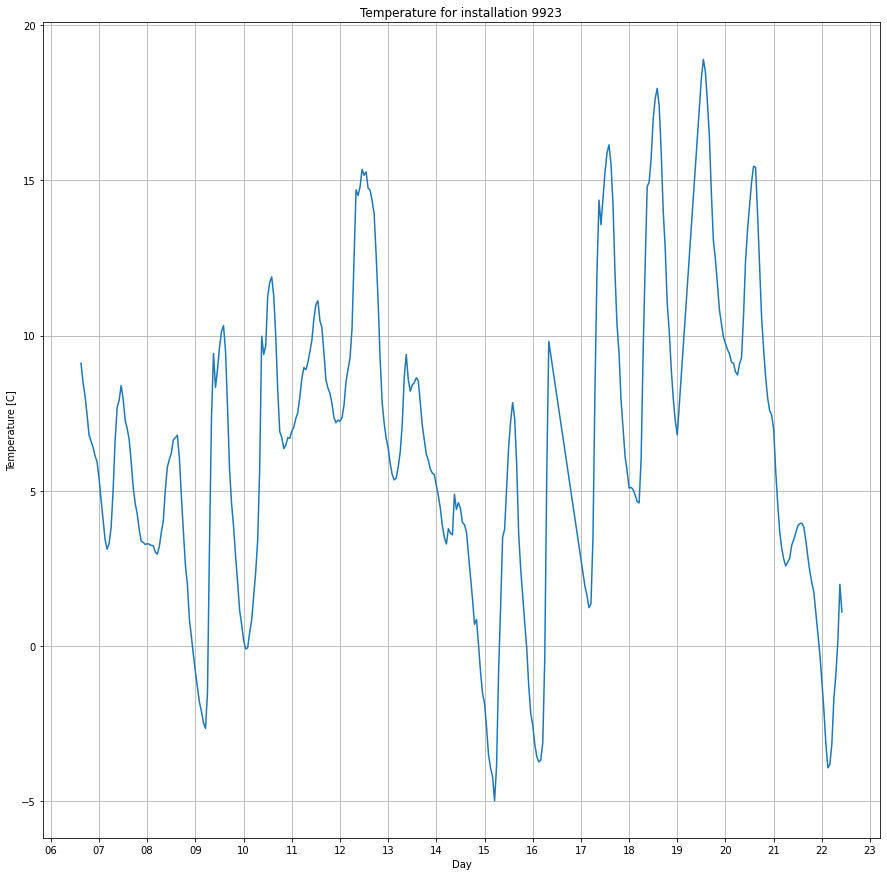

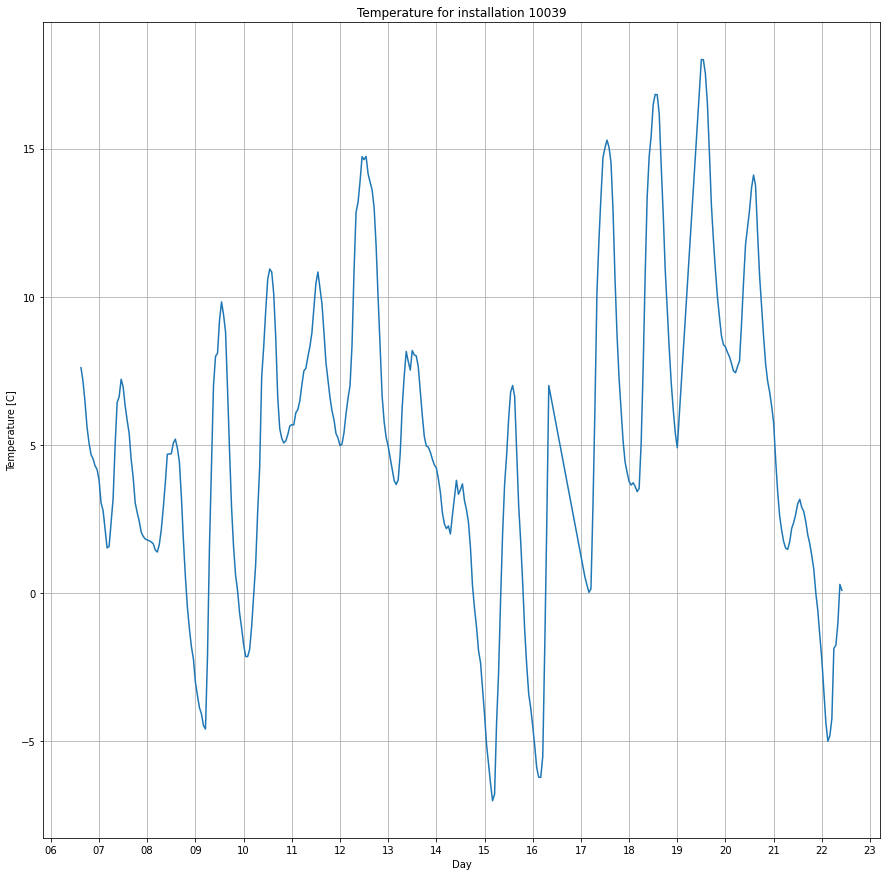

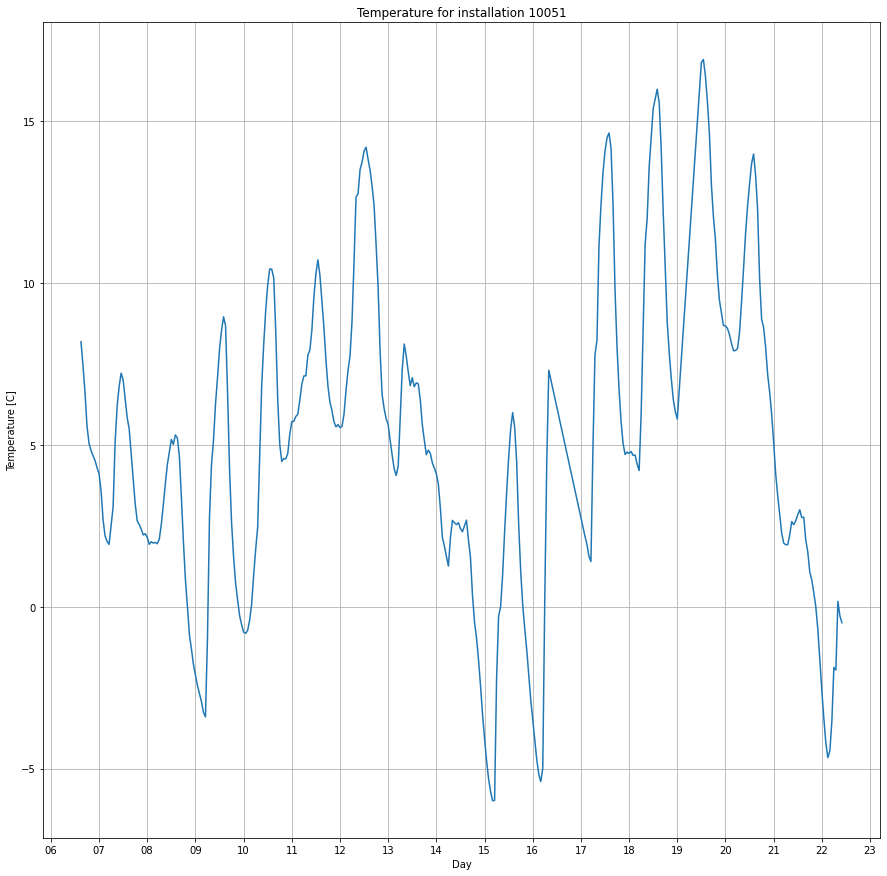

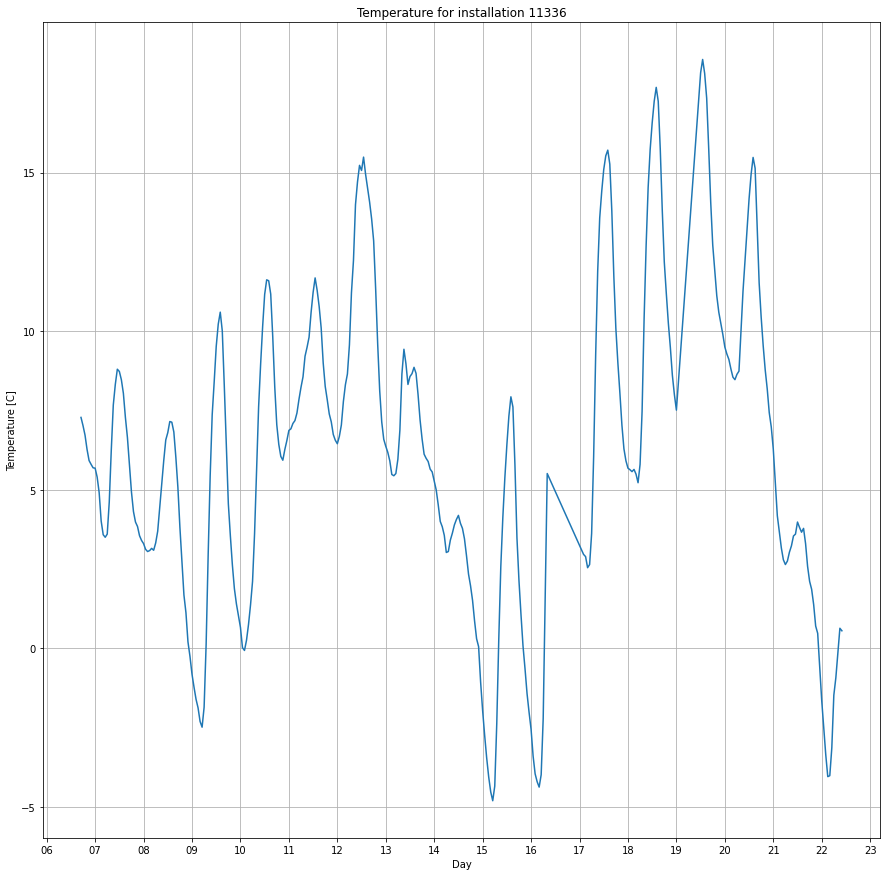

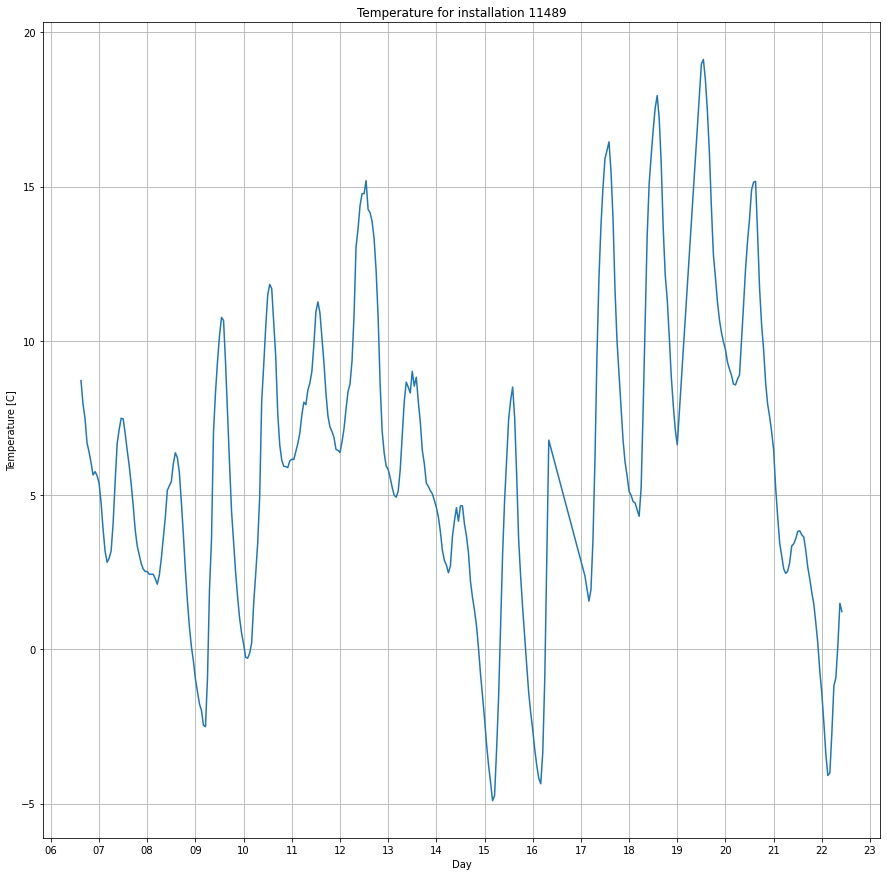

In [74]:
for id in installationd_id:
    plot_temperature(id)

## Wykresy wilgotności dla każdej stacji

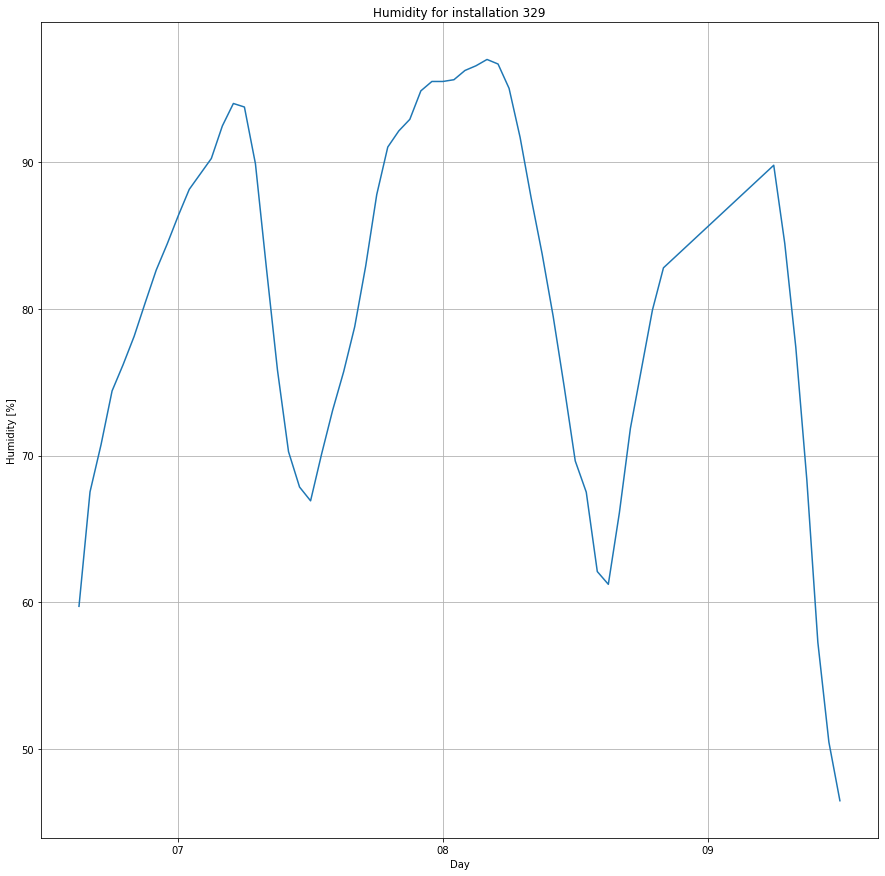

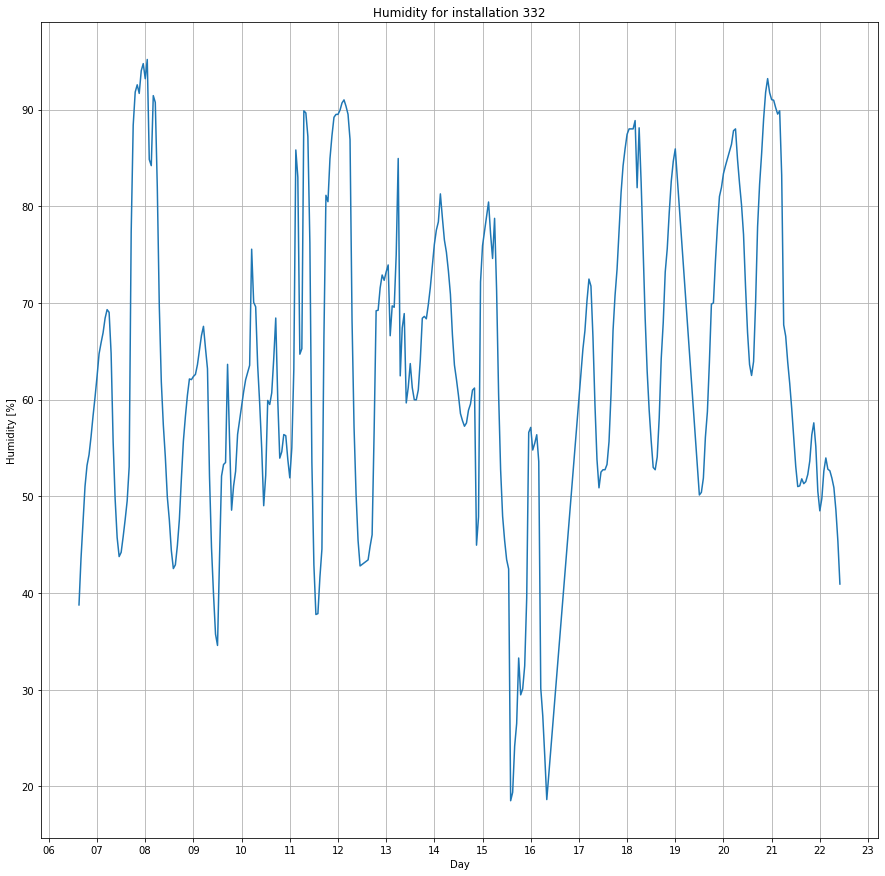

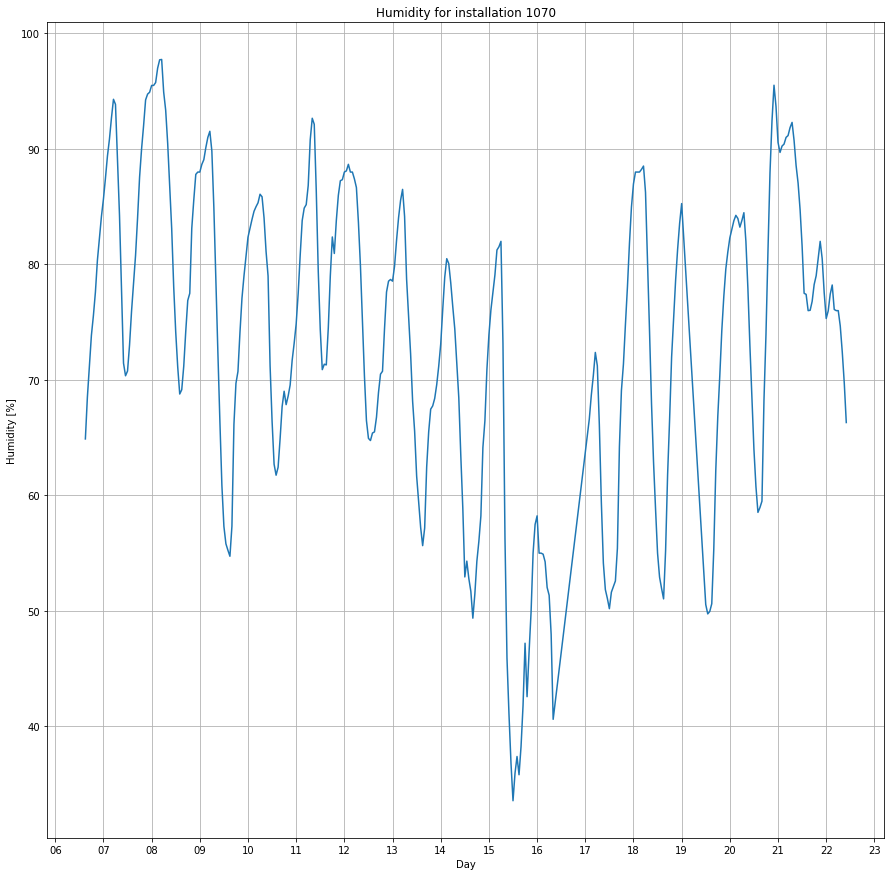

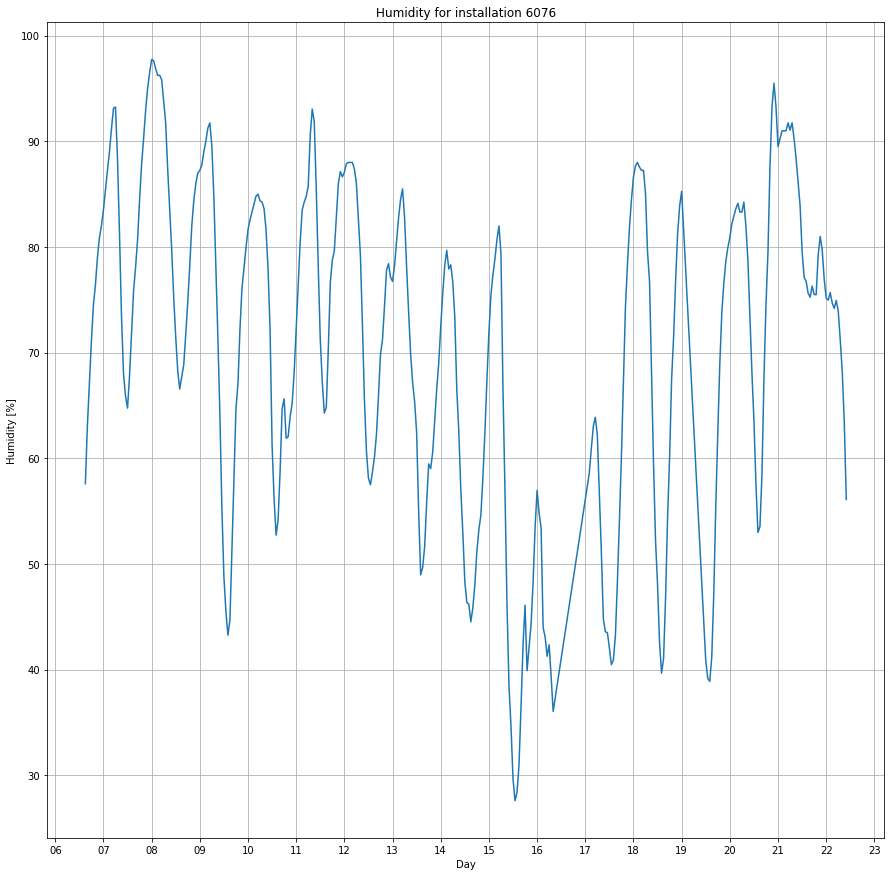

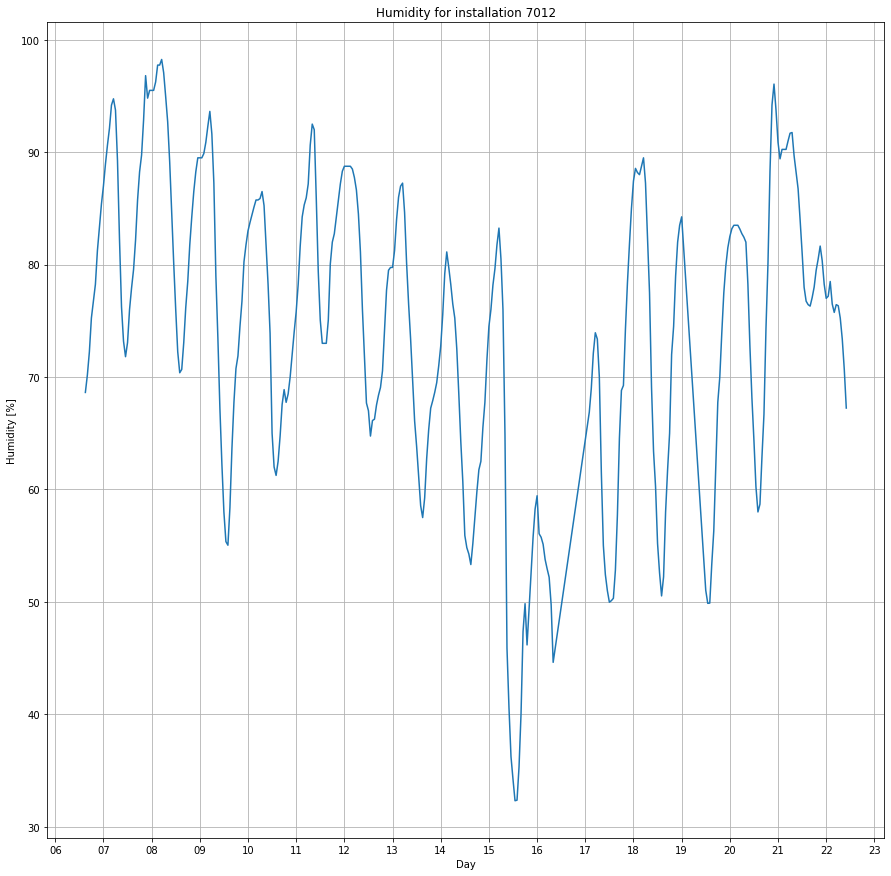

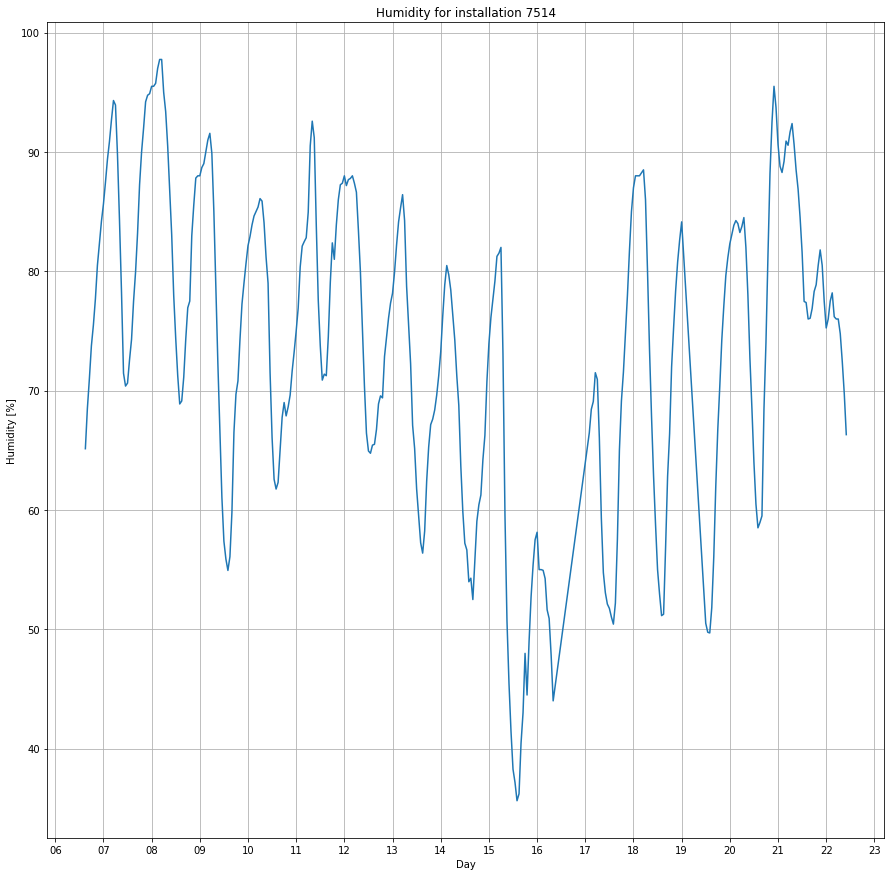

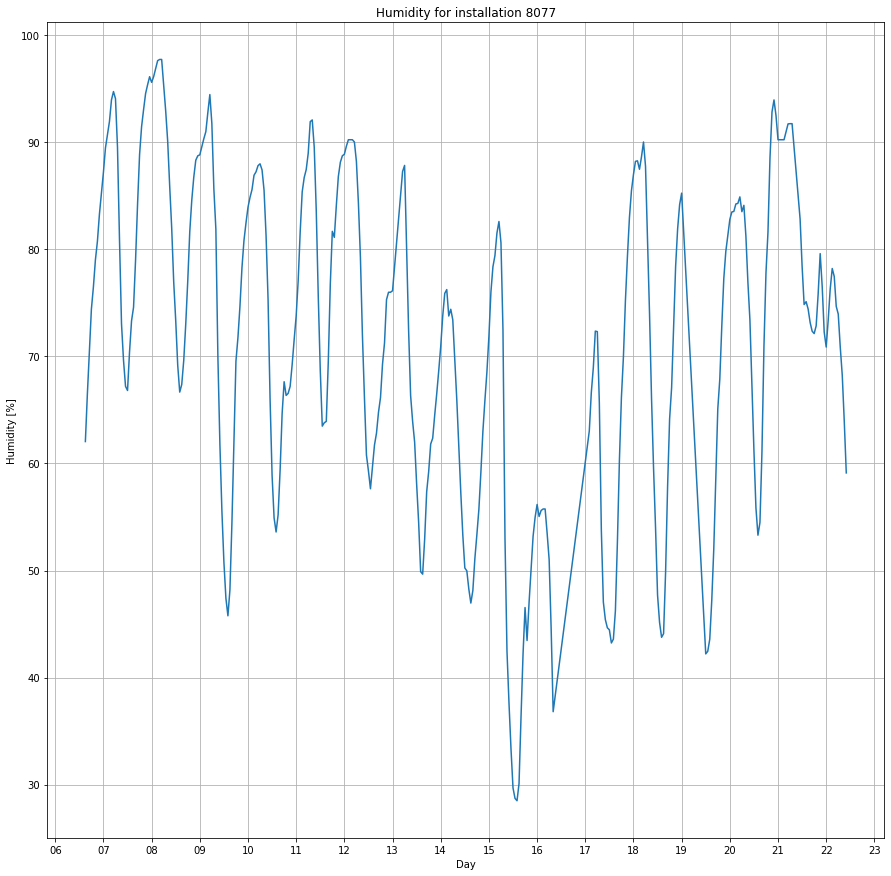

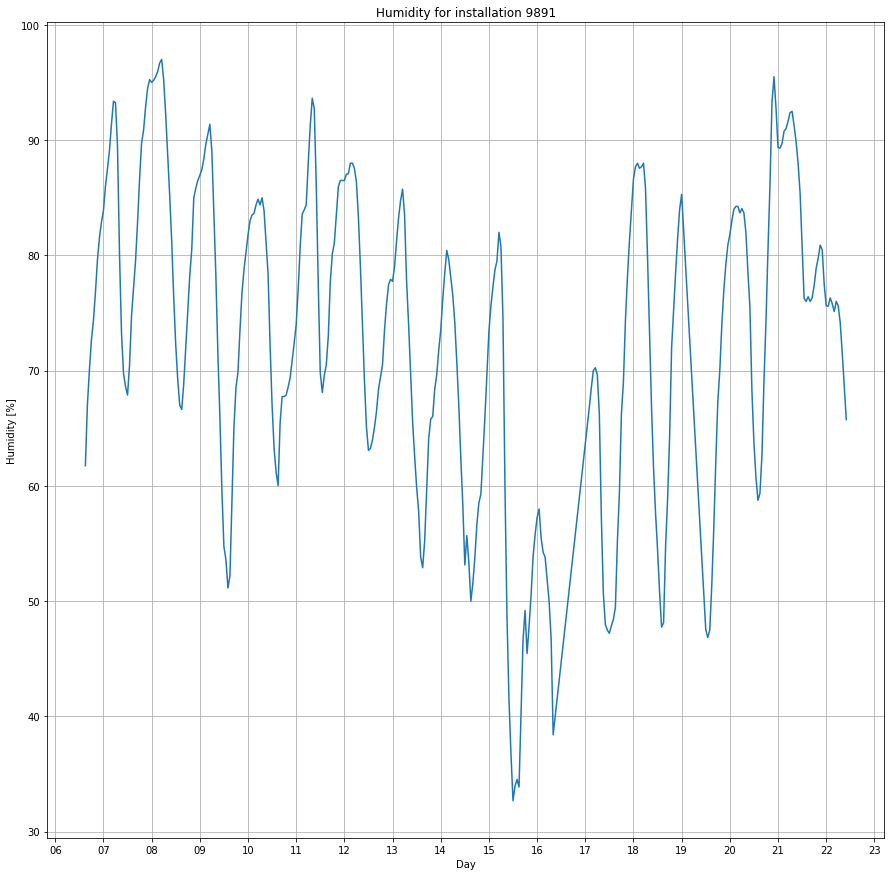

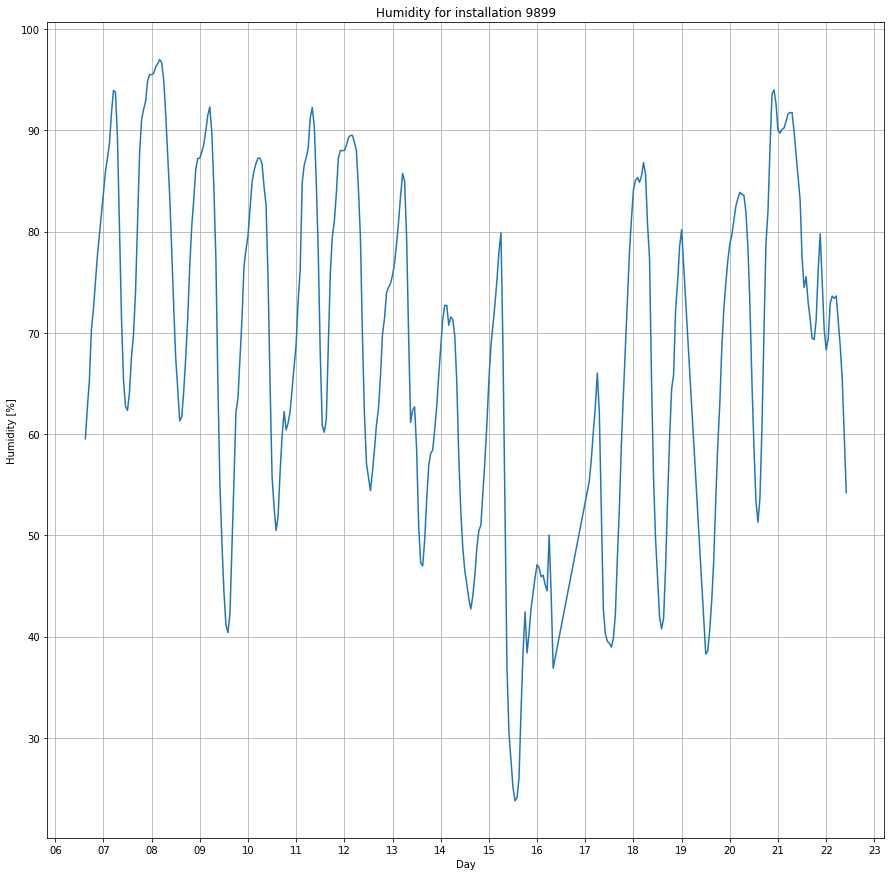

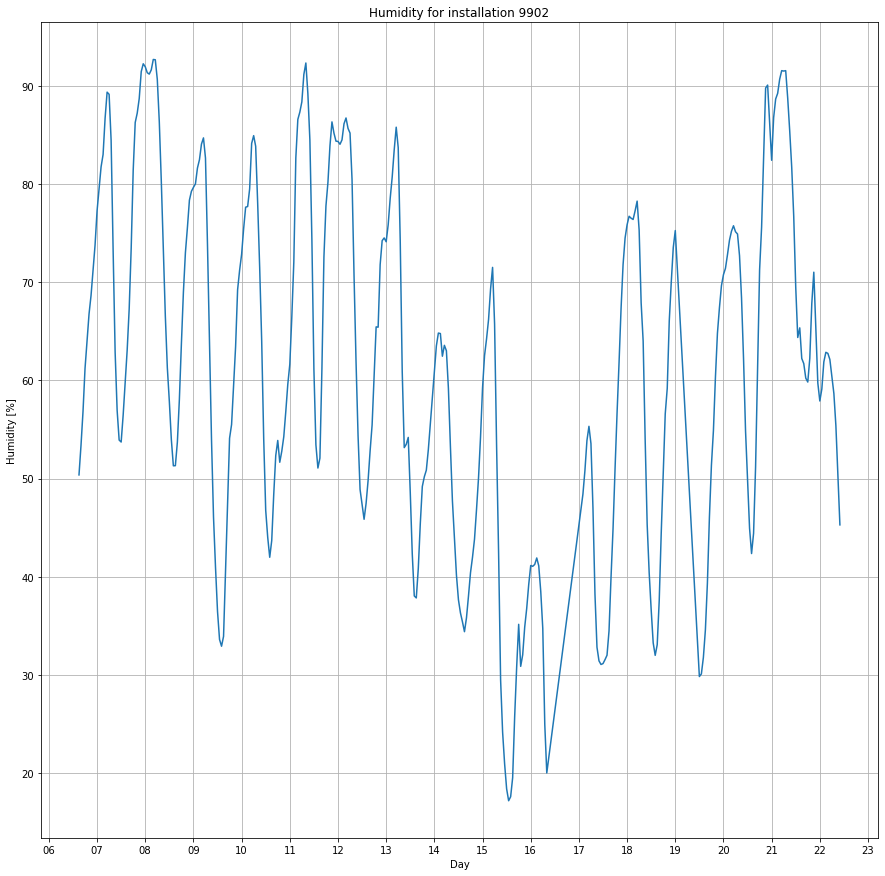

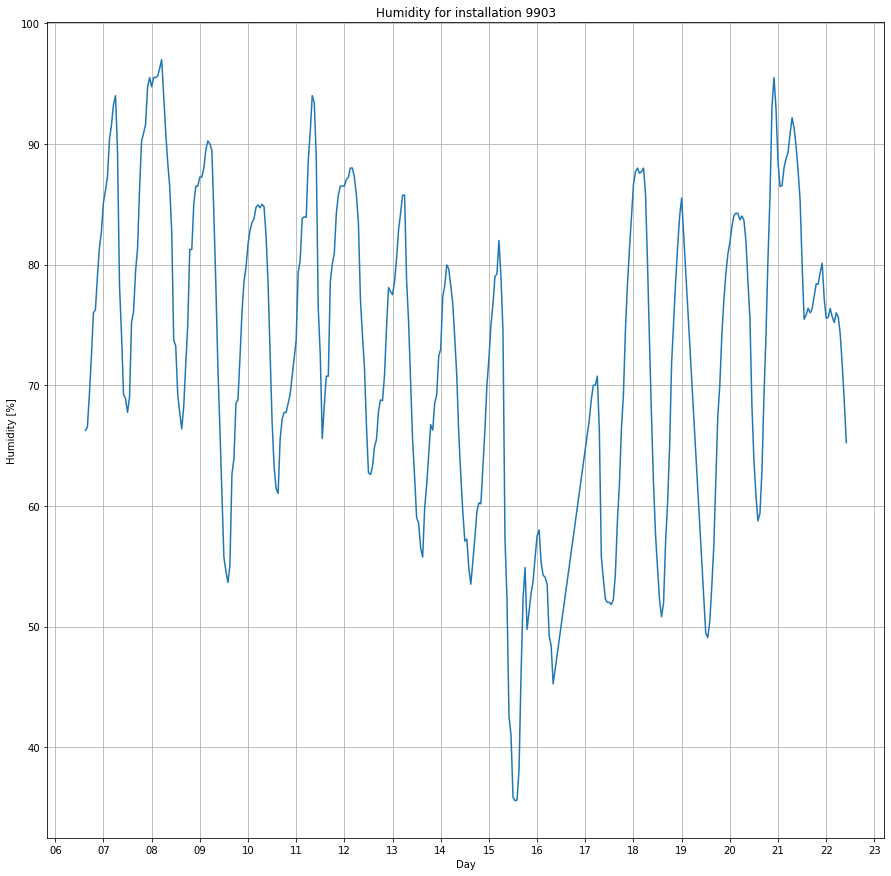

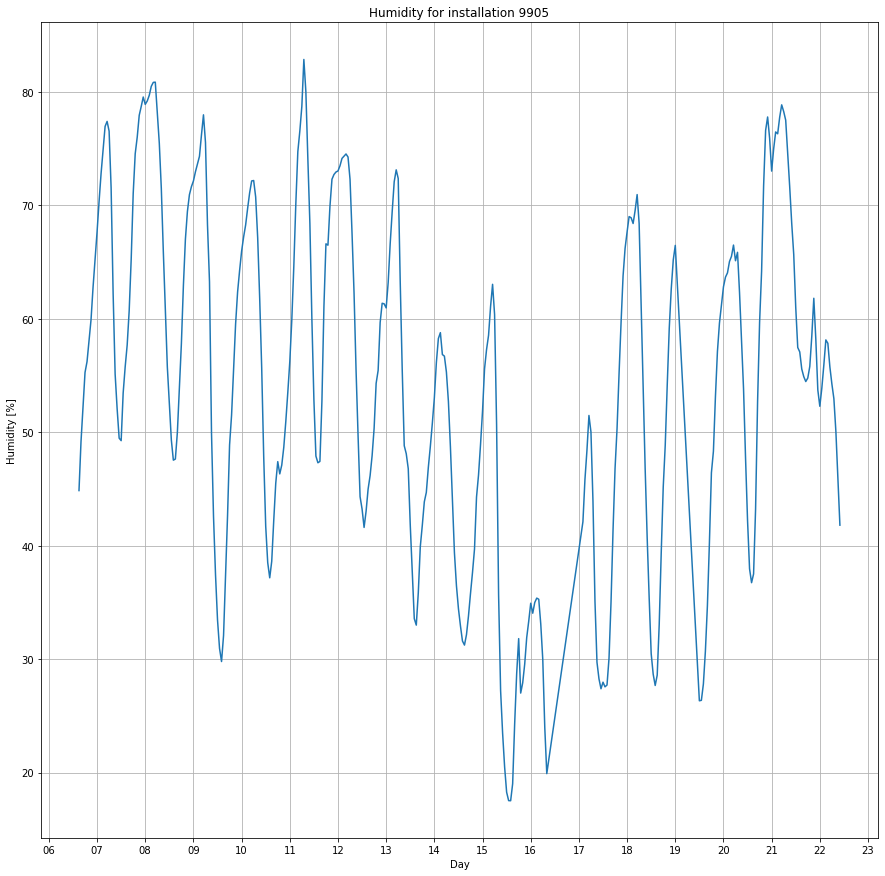

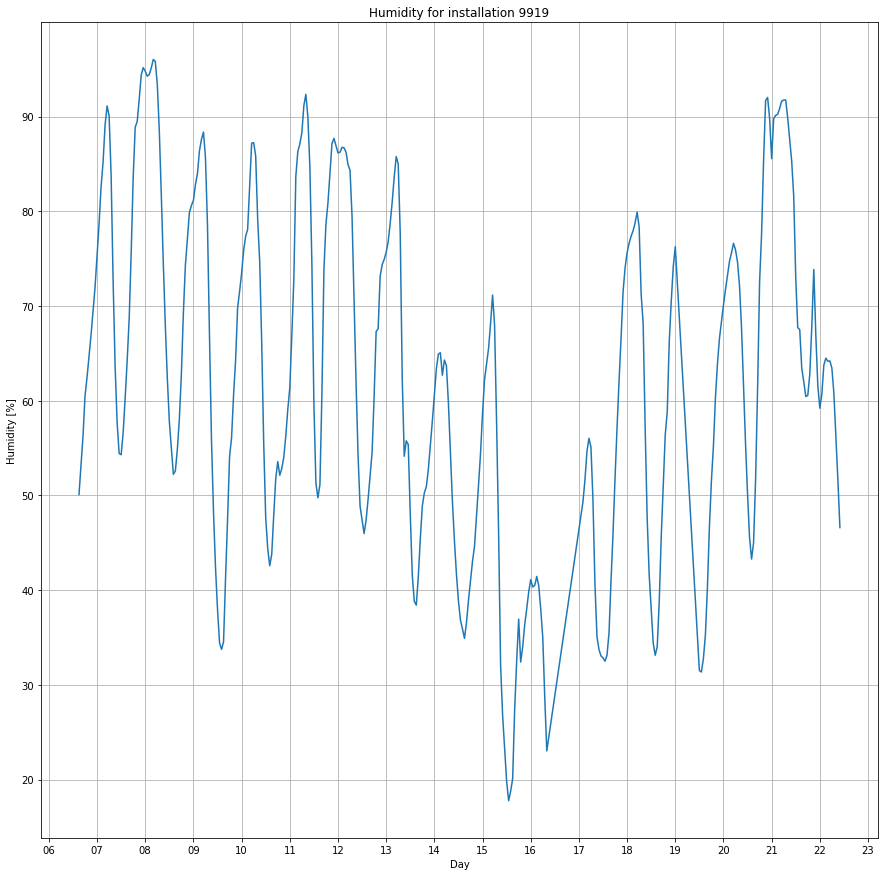

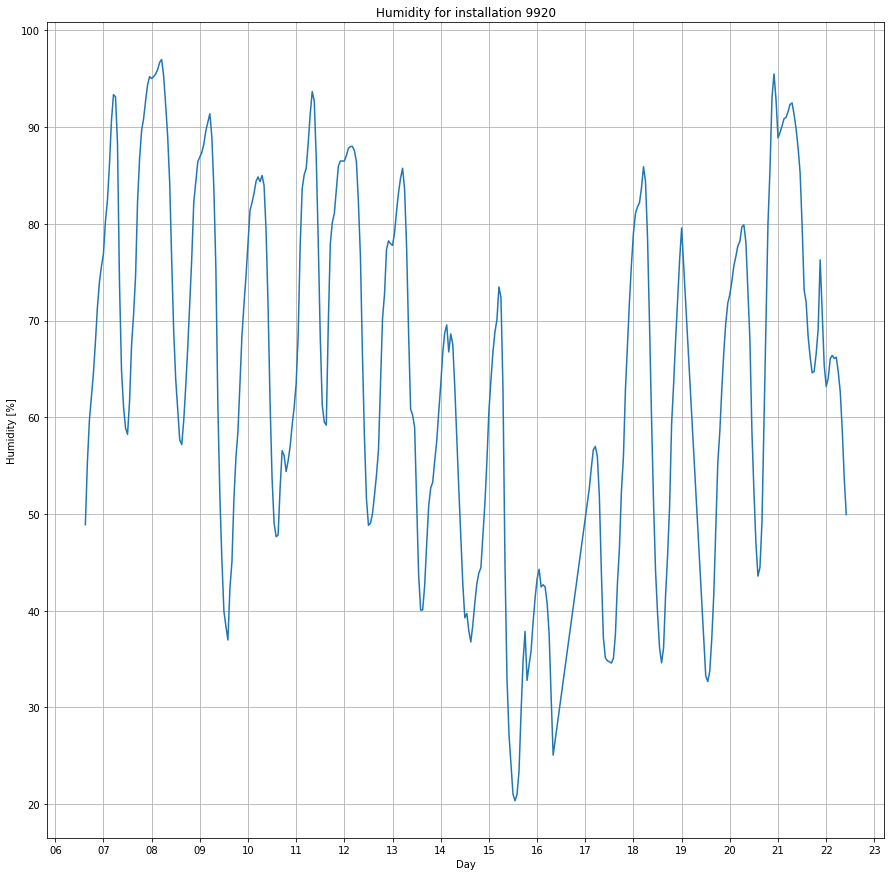

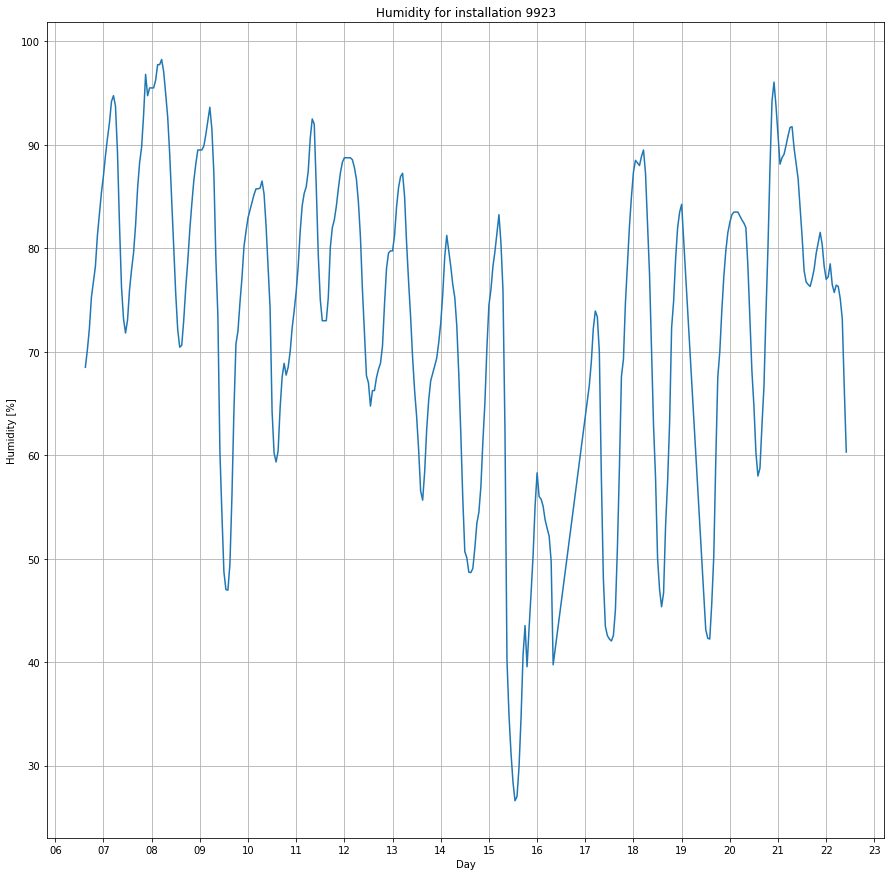

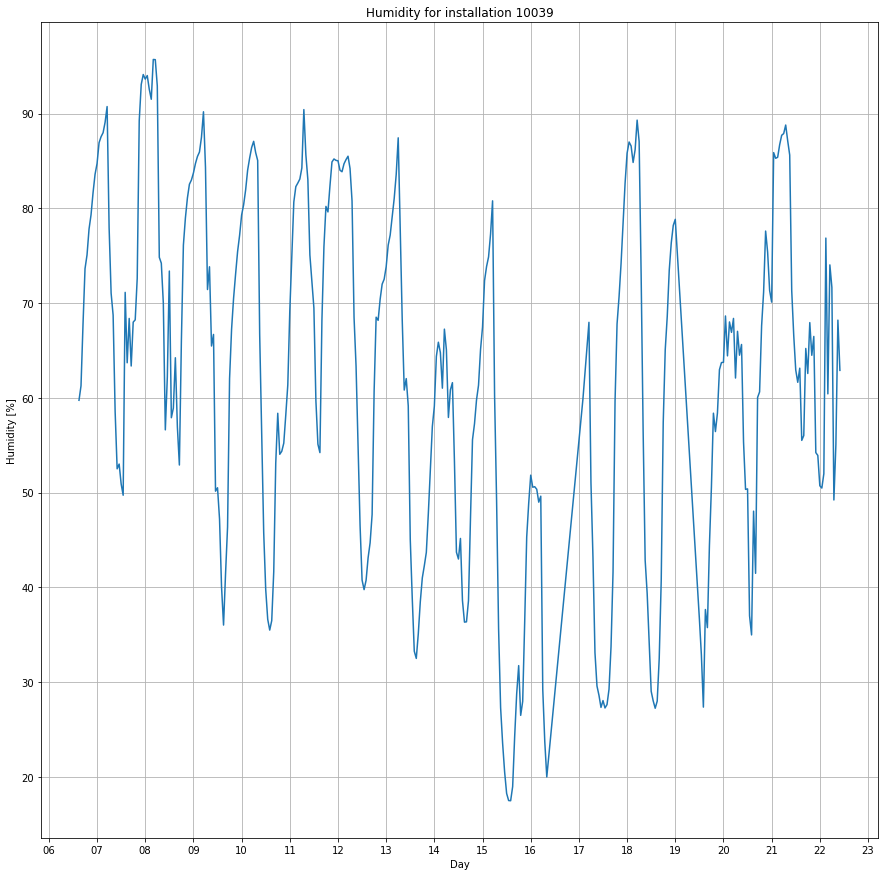

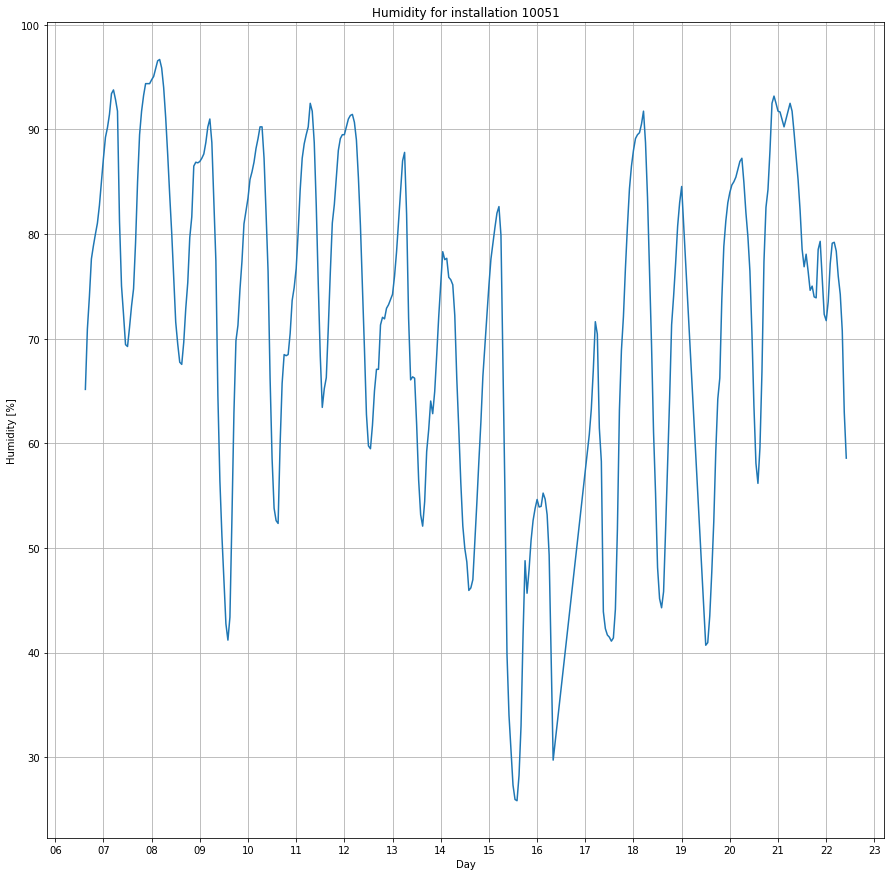

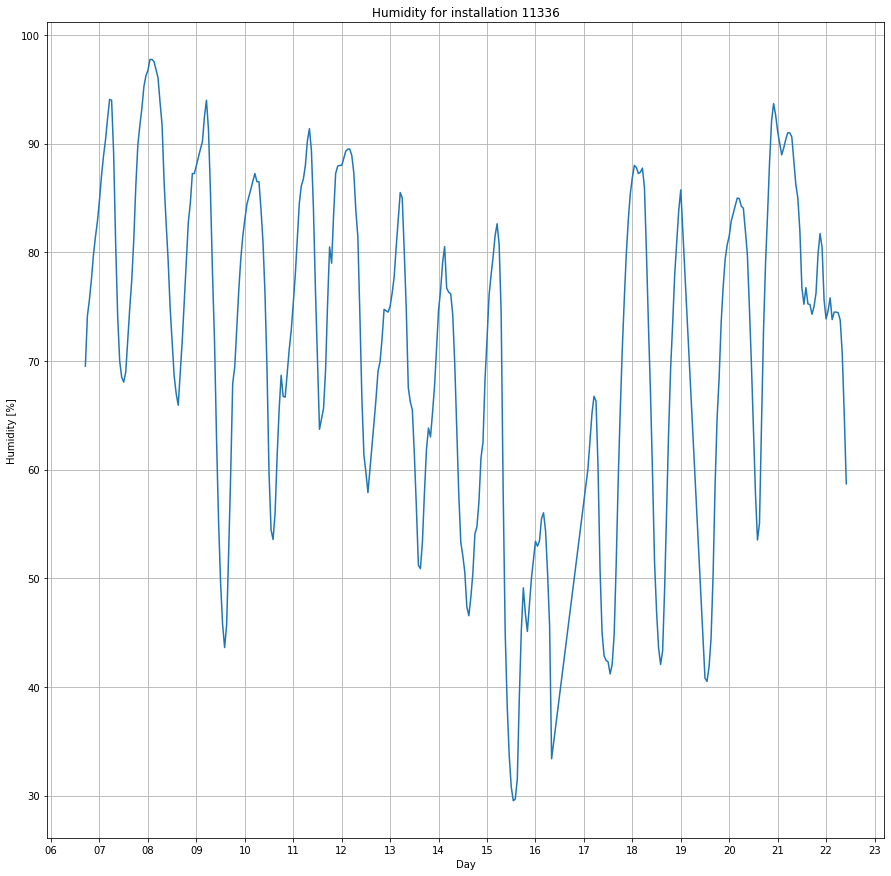

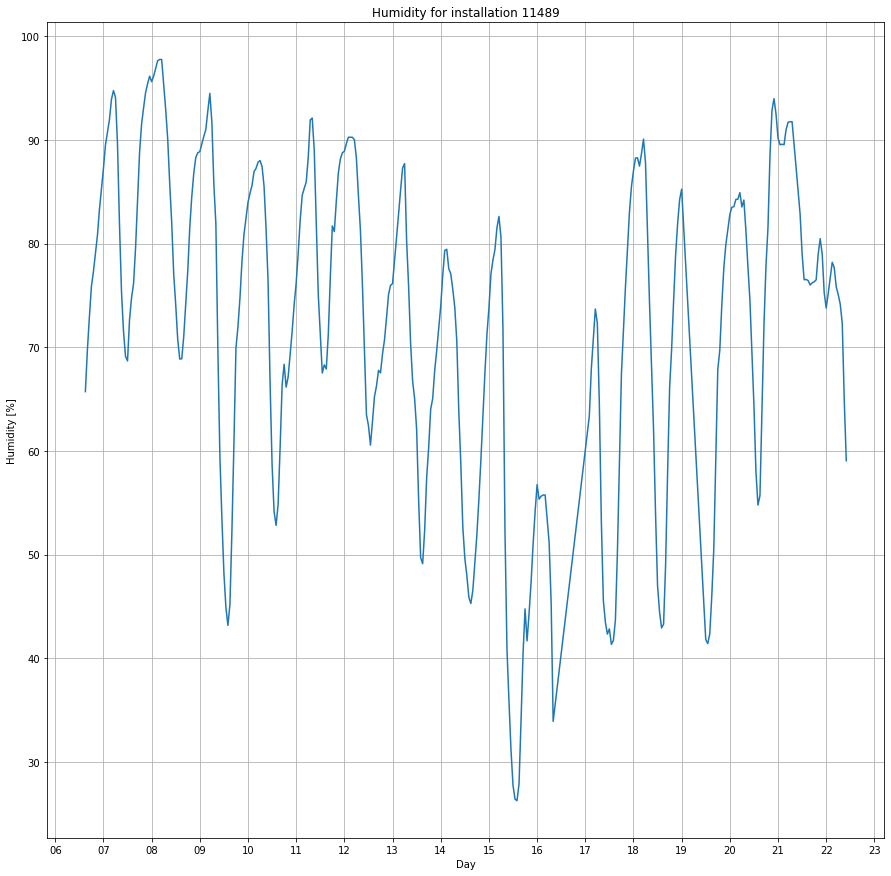

In [75]:
for id in installationd_id:
    plot_humidity(id)

## Przetwarzanie danych

In [125]:
from sklearn import preprocessing

data = df.iloc[:, 3:]
data.corr()

PM1      PM25      PM10  PRESSURE  HUMIDITY  TEMPERATURE  \
PM1            1.000000  0.990781  0.971942  0.200228  0.277018    -0.192720   
PM25           0.990781  1.000000  0.982926  0.196283  0.276832    -0.206322   
PM10           0.971942  0.982926  1.000000  0.215305  0.269612    -0.214653   
PRESSURE       0.200228  0.196283  0.215305  1.000000 -0.263967    -0.232223   
HUMIDITY       0.277018  0.276832  0.269612 -0.263967  1.000000    -0.214134   
TEMPERATURE   -0.192720 -0.206322 -0.214653 -0.232223 -0.214134     1.000000   
indexValue     0.928613  0.932949  0.958764  0.246540  0.270334    -0.196101   
NO2                 NaN  0.396566  0.525017 -0.347937 -0.025242     0.059556   
CO                  NaN  0.887927  0.910409  0.167968 -0.139637    -0.204646   
CLOUDCOVER    -0.344331 -0.338496 -0.348335 -0.274827  0.359022    -0.176478   
WINDDIRECTION  0.052681  0.048594  0.040035 -0.112515  0.075191     0.262239   
WINDSPEED     -0.400420 -0.390520 -0.414290 -0.109555 -0.061885     0.065566   

               indexValue       NO2        CO  CLOUDCOVER  WINDDIRECTION  \
PM1              0.928613       NaN       NaN   -0.344331       0.052681   
PM25             0.932949  0.396566  0.887927   -0.338496       0.048594   
PM10             0.958764  0.525017  0.910409   -0.348335       0.040035   
PRESSURE         0.246540 -0.347937  0.167968   -0.274827      -0.112515   
HUMIDITY         0.270334 -0.025242 -0.139637    0.359022       0.075191   
TEMPERATURE     -0.196101  0.059556 -0.204646   -0.176478       0.262239   
indexValue       1.000000  0.512349  0.887587   -0.349952       0.027157   
NO2              0.512349  1.000000  0.603558   -0.357755       0.132520   
CO               0.887587  0.603558  1.000000   -0.420134      -0.044752   
CLOUDCOVER      -0.349952 -0.357755 -0.420134    1.000000      -0.164591   
WINDDIRECTION    0.027157  0.132520 -0.044752   -0.164591       1.000000   
WINDSPEED       -0.456984 -0.260033 -0.397392    0.267924       0.398440   

               WINDSPEED  
PM1            -0.400420  
PM25           -0.390520  
PM10           -0.414290  
PRESSURE       -0.109555  
HUMIDITY       -0.061885  
TEMPERATURE     0.065566  
indexValue     -0.456984  
NO2            -0.260033  
CO             -0.397392  
CLOUDCOVER      0.267924  
WINDDIRECTION   0.398440  
WINDSPEED       1.000000

## Korelacja pomiędzy temperaturą, wilgotnością a prędkością wiatru

In [140]:
from IPython.display import display, HTML

for id in installationd_id:
    dd = df.loc[df['installationId'] == id][['TEMPERATURE', 'HUMIDITY', 'WINDSPEED']]
    cor = dd.corr()
    print('Stacja: ' + str(id))
    display(HTML(cor.to_html()))
    print()

Stacja: 19



Stacja: 329



Stacja: 332



Stacja: 1070



Stacja: 6076



Stacja: 7012



Stacja: 7514



Stacja: 8077



Stacja: 8126



Stacja: 9891



Stacja: 9892



Stacja: 9899



Stacja: 9902



Stacja: 9903



Stacja: 9905



Stacja: 9919



Stacja: 9920



Stacja: 9923



Stacja: 9996



Stacja: 10039



Stacja: 10051



Stacja: 11336



Stacja: 11489
